# Importing Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import binarize
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_main= pd.read_excel('/content/drive/MyDrive/jd_sports_task/Data_Scientist_Task.xlsx', sheet_name= 'STR_sample_data')

In [ ]:
df= df_main.copy()
df

,customer_site_id,orders_1yr,line_items_1yr,days_since_last_purchase_1yr,prop_reduced_items_1yr,promo_customer_blc_1yr,promo_customer_freedelivery_1yr,Brand_Nike_prop_revenue_1yr,Brand_Adidas_prop_revenue_1yr,Device_mobile_prop_revenue_1yr,Device_iosapp_prop_revenue_1yr,Delivery_NextDay_prop_revenue_1yr,Payment_bnpl_prop_revenue_1yr,amount_paid_per_order_1yr,Current_RFM_Segment,ONS_Segment,repurchased
0,JD-40fb5572b02ce75726cc90aadcb676aa4b7c7143cd4...,2.0,3,198.0,0.333333,0,1,0.315789,0.315789,0.000000,0.0,0.0,0.0,100.89000,Existing_2. POTENTIALS,ONS_6,0
1,JD-ee4b7217e38b2fbca53c28494b0d59e7ae12f51fc9c...,1.0,1,141.0,1.000000,0,0,1.000000,0.000000,0.000000,0.0,0.0,0.0,238.95000,New_3. CASUALS / AVERAGE,ONS_5,0
2,JD-496c75b8905feacee992ee784f7f157b86ae155ff63...,1.0,1,210.0,0.000000,0,0,0.000000,1.000000,0.000000,1.0,0.0,1.0,106.20000,Existing_3. CASUALS / AVERAGE,ONS_5,0
3,JD-9000edec54bf90d58ff7f7319d20d3c0855a19f5188...,2.0,7,226.0,0.000000,0,1,0.346756,0.000000,0.346756,0.0,0.0,1.0,395.59500,Existing_2. POTENTIALS,ONS_8,0
4,JD-370802c16c3997b62605e29e75f86e19e6dcd6947ac...,2.0,2,69.0,0.000000,0,1,1.000000,0.000000,1.000000,0.0,0.0,0.0,123.90000,New_2. POTENTIALS,ONS_4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,JD-cf346f623463c2fd719c3e1f055d9d9fd9e60317520...,1.0,1,233.0,0.000000,0,0,1.000000,0.000000,1.000000,0.0,0.0,0.0,111.51000,Existing_3. CASUALS / AVERAGE,ONS_6,0
100996,JD-0997b5480f5cbc564aae65429f32145e1d7b4f4358d...,1.0,1,88.0,0.000000,0,1,1.000000,0.000000,1.000000,0.0,0.0,0.0,159.30000,Existing_3. CASUALS / AVERAGE,ONS_4,0
100997,JD-d91513edd1c9e01ce22ebd9b3f3dff6defb677c26d6...,2.0,3,32.0,0.000000,1,1,0.000000,1.000000,1.000000,0.0,0.0,0.0,145.49399,New_2. POTENTIALS,ONS_6,0
100998,JD-bfa256a328e21cadf3ac591ba92da396fa39e53ff13...,1.0,1,346.0,0.000000,0,1,1.000000,0.000000,1.000000,0.0,0.0,0.0,153.99000,Existing_3. CASUALS / AVERAGE,ONS_6,1


# Exploratory Data Analysis

### Removing Duplicates

In [ ]:
df_dup= df[df.duplicated(keep=False)].sort_values('customer_site_id')
df_dup.head(6)

,customer_site_id,orders_1yr,line_items_1yr,days_since_last_purchase_1yr,prop_reduced_items_1yr,promo_customer_blc_1yr,promo_customer_freedelivery_1yr,Brand_Nike_prop_revenue_1yr,Brand_Adidas_prop_revenue_1yr,Device_mobile_prop_revenue_1yr,Device_iosapp_prop_revenue_1yr,Delivery_NextDay_prop_revenue_1yr,Payment_bnpl_prop_revenue_1yr,amount_paid_per_order_1yr,Current_RFM_Segment,ONS_Segment,repurchased
37691,JD-00230ed85647c80952a0934eef2ce18e852fd230f35...,5.0,10,118.0,0.300000,1,1,0.304846,0.000000,0.906201,0.093799,0.0,0.000000,135.8652,Existing_2. POTENTIALS,ONS_5,0
100747,JD-00230ed85647c80952a0934eef2ce18e852fd230f35...,5.0,10,118.0,0.300000,1,1,0.304846,0.000000,0.906201,0.093799,0.0,0.000000,135.8652,Existing_2. POTENTIALS,ONS_5,0
99089,JD-002f2f9e3ac5bd5b3f8256bc4d58072dae496d8cdbf...,5.0,8,110.0,0.625000,1,1,0.218955,0.140757,0.483891,0.000000,0.0,0.765405,113.1738,Existing_2. POTENTIALS,ONS_6,0
100078,JD-002f2f9e3ac5bd5b3f8256bc4d58072dae496d8cdbf...,5.0,8,110.0,0.625000,1,1,0.218955,0.140757,0.483891,0.000000,0.0,0.765405,113.1738,Existing_2. POTENTIALS,ONS_6,0
72559,JD-00352dba7b4e6f3a044e1b16393cec847f5adf19adc...,2.0,7,184.0,0.714286,0,1,0.727273,0.000000,0.272727,0.000000,0.0,0.000000,194.7000,Existing_2. POTENTIALS,ONS_6,0
100380,JD-00352dba7b4e6f3a044e1b16393cec847f5adf19adc...,2.0,7,184.0,0.714286,0,1,0.727273,0.000000,0.272727,0.000000,0.0,0.000000,194.7000,Existing_2. POTENTIALS,ONS_6,0


In [ ]:
df_dup.describe()

,orders_1yr,line_items_1yr,days_since_last_purchase_1yr,prop_reduced_items_1yr,promo_customer_blc_1yr,promo_customer_freedelivery_1yr,Brand_Nike_prop_revenue_1yr,Brand_Adidas_prop_revenue_1yr,Device_mobile_prop_revenue_1yr,Device_iosapp_prop_revenue_1yr,Delivery_NextDay_prop_revenue_1yr,Payment_bnpl_prop_revenue_1yr,amount_paid_per_order_1yr,repurchased
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1.877000,3.558000,164.987000,0.314930,0.140000,0.455000,0.363038,0.174909,0.586558,0.179561,0.090841,0.196878,135.648622,0.14300
std,1.915125,5.242745,106.234927,0.399459,0.347074,0.498095,0.423144,0.335121,0.468988,0.363924,0.262453,0.380619,122.480948,0.35016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,1.000000,61.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.800000,0.00000
50%,1.000000,2.000000,179.000000,0.000000,0.000000,0.000000,0.095979,0.000000,1.000000,0.000000,0.000000,0.000000,111.510000,0.00000
75%,2.000000,4.000000,244.000000,0.666667,0.000000,1.000000,0.919481,0.133604,1.000000,0.000000,0.000000,0.000000,168.150000,0.00000
max,19.000000,52.000000,369.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2239.050000,1.00000


In [ ]:
df.describe()

,orders_1yr,line_items_1yr,days_since_last_purchase_1yr,prop_reduced_items_1yr,promo_customer_blc_1yr,promo_customer_freedelivery_1yr,Brand_Nike_prop_revenue_1yr,Brand_Adidas_prop_revenue_1yr,Device_mobile_prop_revenue_1yr,Device_iosapp_prop_revenue_1yr,Delivery_NextDay_prop_revenue_1yr,Payment_bnpl_prop_revenue_1yr,amount_paid_per_order_1yr,repurchased
count,100992.000000,101000.000000,100992.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000
mean,1.971968,3.642109,164.282151,0.296900,0.136069,0.475713,0.372078,0.170541,0.599181,0.185461,0.077368,0.204002,134.918016,0.152950
std,2.726879,6.452443,105.741296,0.388775,0.342864,0.499412,0.419271,0.325974,0.467257,0.372318,0.241737,0.385853,104.384772,0.359942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.873700,0.000000
50%,1.000000,2.000000,170.000000,0.000000,0.000000,0.000000,0.154086,0.000000,1.000000,0.000000,0.000000,0.000000,113.280000,0.000000
75%,2.000000,4.000000,246.000000,0.521739,0.000000,1.000000,0.839707,0.162562,1.000000,0.000000,0.000000,0.000000,171.690000,0.000000
max,286.000000,781.000000,369.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2985.990000,1.000000


In [ ]:
# as the data distribution in the duplicated data and the overall data more or less looks same, I think it is safe to drop them.
df.drop_duplicates(['customer_site_id'], inplace= True)

In [ ]:
df.describe()

,orders_1yr,line_items_1yr,days_since_last_purchase_1yr,prop_reduced_items_1yr,promo_customer_blc_1yr,promo_customer_freedelivery_1yr,Brand_Nike_prop_revenue_1yr,Brand_Adidas_prop_revenue_1yr,Device_mobile_prop_revenue_1yr,Device_iosapp_prop_revenue_1yr,Delivery_NextDay_prop_revenue_1yr,Payment_bnpl_prop_revenue_1yr,amount_paid_per_order_1yr,repurchased
count,99992.000000,100000.000000,99992.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.972918,3.642950,164.275102,0.296720,0.136030,0.475920,0.372168,0.170497,0.599308,0.185520,0.077233,0.204073,134.910710,0.153050
std,2.733766,6.463402,105.736591,0.388663,0.342822,0.499422,0.419232,0.325882,0.467239,0.372402,0.241518,0.385906,104.188271,0.360037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.738000,0.000000
50%,1.000000,2.000000,170.000000,0.000000,0.000000,0.000000,0.155198,0.000000,1.000000,0.000000,0.000000,0.000000,113.280000,0.000000
75%,2.000000,4.000000,246.000000,0.519423,0.000000,1.000000,0.839416,0.162731,1.000000,0.000000,0.000000,0.000000,171.860360,0.000000
max,286.000000,781.000000,369.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2985.990000,1.000000


### Checking Categorical Variables

In [ ]:
df.repurchased.value_counts()
# Imbalanced dataset

,count
repurchased,
0,84695
1,15305


In [ ]:
df.promo_customer_freedelivery_1yr.value_counts()
# free delivery seems to have a lot of impact on future sales

,count
promo_customer_freedelivery_1yr,
0,52408
1,47592


In [ ]:
df.Current_RFM_Segment.value_counts().sort_index()

,count
Current_RFM_Segment,
Existing_1. VIP,8571
Existing_2. POTENTIALS,16754
Existing_3. CASUALS / AVERAGE,38675
Existing_4. LAPSED,494
Existing_5. DORMANT,165
New_1. VIP,993
New_2. POTENTIALS,4588
New_3. CASUALS / AVERAGE,29396
UNKNOWN,364


In [ ]:
# RFM_Segment Vs Target variable
pd.crosstab(df['Current_RFM_Segment'], df['repurchased'], normalize= 'index')
# Interesting patterns here

repurchased,0,1
Current_RFM_Segment,,
Existing_1. VIP,0.519193,0.480807
Existing_2. POTENTIALS,0.756715,0.243285
Existing_3. CASUALS / AVERAGE,0.881732,0.118268
Existing_4. LAPSED,0.884615,0.115385
Existing_5. DORMANT,0.860606,0.139394
New_1. VIP,0.671702,0.328298
New_2. POTENTIALS,0.868570,0.131430
New_3. CASUALS / AVERAGE,0.950129,0.049871
UNKNOWN,0.837912,0.162088


### Checking continous variables

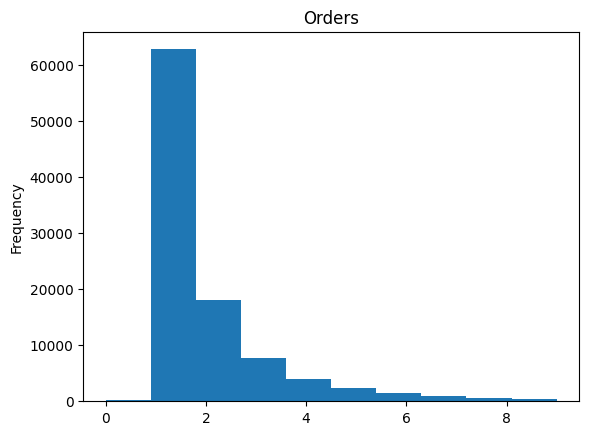

In [ ]:
df.loc[df.orders_1yr<10,'orders_1yr'].plot(kind='hist', bins=10, title='Orders')
plt.show()
# are 0 orders errors?

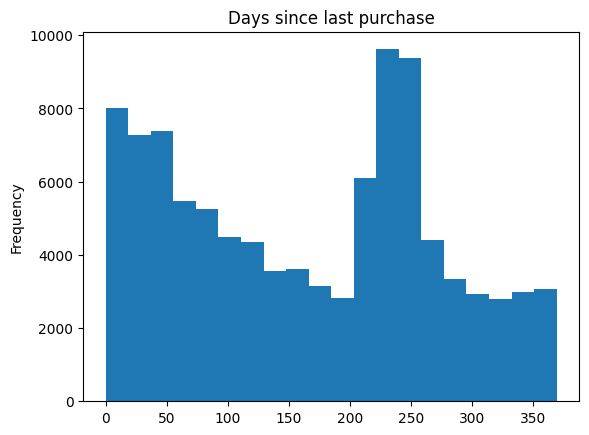

In [ ]:
df.days_since_last_purchase_1yr.plot(kind='hist', bins=20, title='Days since last purchase')
plt.show()
# interesting pattern. It is difficult to interpret the plot without more knowledge about how the data was gathered.

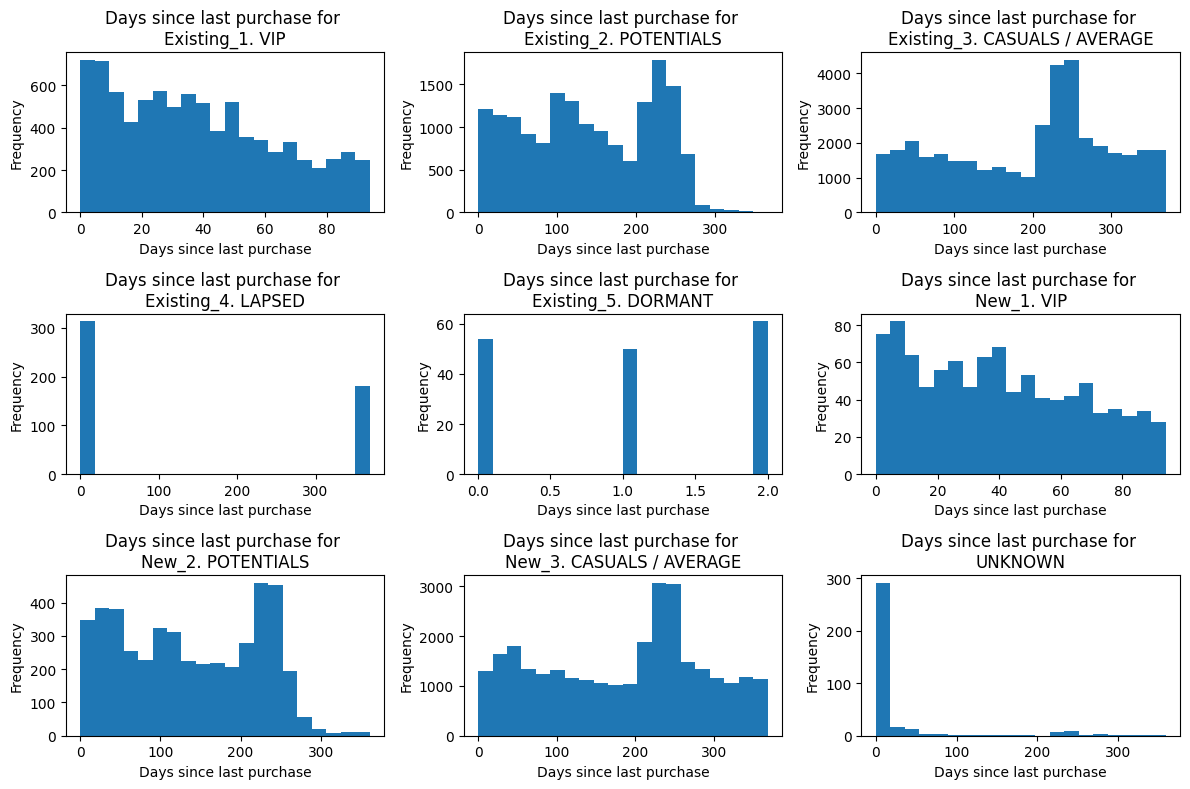

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()

rfm_segments = df.Current_RFM_Segment.unique().tolist()
rfm_segments.sort()

for i, segment in enumerate(rfm_segments):
  ax = axes[i]
  ax.hist(df.loc[df.Current_RFM_Segment== segment, 'days_since_last_purchase_1yr'], bins=20)
  ax.set_title(f'Days since last purchase for \n{segment}')
  ax.set_xlabel('Days since last purchase')
  ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# interesting patterns here. I guess it is expected as RFM segments have a factor of 'Recency' in them which is dependent on 'Last purchase date'
# difficult to understand 'Existing_4. LAPSED' and 'Existing_5. DORMANT'
# later we will use this to impute values for 'days_since_last_purchase_1yr'

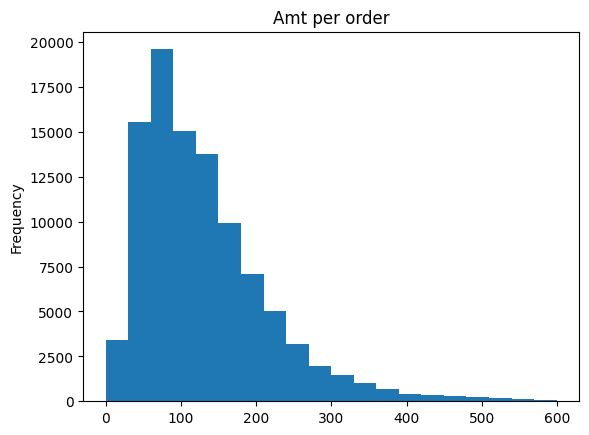

In [ ]:
df.loc[df.amount_paid_per_order_1yr<600, 'amount_paid_per_order_1yr'].plot(kind='hist', bins=20, title='Amt per order')
plt.show()

In [ ]:
df.amount_paid_per_order_1yr.median()

113.28

### Treating NA values

In [ ]:
df[df.orders_1yr.isna()]
# logically orders_1yr is related to line_items_1yr to lets try to use that to impute NA values.

,customer_site_id,orders_1yr,line_items_1yr,days_since_last_purchase_1yr,prop_reduced_items_1yr,promo_customer_blc_1yr,promo_customer_freedelivery_1yr,Brand_Nike_prop_revenue_1yr,Brand_Adidas_prop_revenue_1yr,Device_mobile_prop_revenue_1yr,Device_iosapp_prop_revenue_1yr,Delivery_NextDay_prop_revenue_1yr,Payment_bnpl_prop_revenue_1yr,amount_paid_per_order_1yr,Current_RFM_Segment,ONS_Segment,repurchased
50,JD-751f29831091d357fe864ad74d1a63bdc39ab73079c...,NaN,1,NaN,1.0,0,0,0.000000,0.000000,1.0,0.0,0.0,0.000000,28.320,New_3. CASUALS / AVERAGE,ONS_4,0
120,JD-7cbdfd3d03873d9584717a0d9c497d6d7d2ef23be01...,NaN,4,NaN,0.5,0,0,0.638767,0.123348,0.0,0.0,1.0,0.762115,200.895,Existing_2. POTENTIALS,ONS_7,0
280,JD-aa77ef053e57904f7c6180e8f59db99a085bb21eaac...,NaN,1,NaN,1.0,0,0,0.000000,0.000000,0.0,0.0,0.0,0.000000,26.550,New_3. CASUALS / AVERAGE,ONS_4,0
440,JD-fcc7ebca2343784d21e5f8df74a5038f8961a3f8196...,NaN,1,NaN,0.0,0,0,1.000000,0.000000,0.0,1.0,0.0,0.000000,32.568,New_3. CASUALS / AVERAGE,ONS_6,0
1060,JD-94f5b636ceed95e5f46d2f116cf9ca6d0062c2131c9...,NaN,1,NaN,0.0,1,0,0.000000,1.000000,0.0,0.0,0.0,0.000000,106.200,Existing_3. CASUALS / AVERAGE,ONS_8,0
2060,JD-fb78a646b0e8674ede526cfeef30f24f2462fbb4b4e...,NaN,3,NaN,0.0,0,0,0.736842,0.000000,0.0,1.0,0.0,0.000000,44.840,Existing_3. CASUALS / AVERAGE,ONS_6,0
4060,JD-836c707719be59d3a16314abb00fa242052b5780f26...,NaN,1,NaN,0.0,0,0,1.000000,0.000000,1.0,0.0,0.0,0.000000,70.800,New_3. CASUALS / AVERAGE,ONS_6,0
6060,JD-d54e3acc7e85634596d44a7d25b47963b2a6aef4408...,NaN,1,NaN,1.0,0,0,0.000000,1.000000,1.0,0.0,0.0,0.000000,35.400,New_3. CASUALS / AVERAGE,ONS_4,1


#### Imputing 'orders_1yr'

In [ ]:
pd.crosstab(df[df.line_items_1yr.isin((1, 2, 3, 4))]['line_items_1yr'], df[df.line_items_1yr.isin((1, 2, 3, 4))]['orders_1yr'])

orders_1yr,1.0,2.0,3.0,4.0
line_items_1yr,,,,
1,43121,0,0,0
2,11532,7936,0,0
3,3941,4013,2086,0
4,2018,2319,1594,689


In [ ]:
# calculating most frequent order quantity for each Line item value
most_frequent_orders = df.groupby('line_items_1yr')['orders_1yr'].agg(lambda x: x.mode()[0])

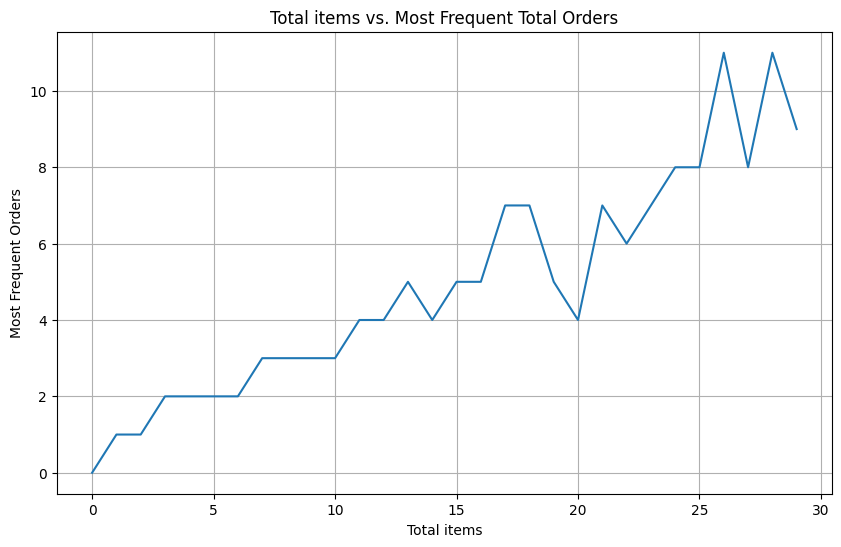

In [ ]:
# Plotting Total items vs Most frequent Total orders

mfo= most_frequent_orders[:30]
plt.figure(figsize=(10, 6))
plt.plot(mfo.index, mfo.values)
plt.xlabel('Total items')
plt.ylabel('Most Frequent Orders')
plt.title('Total items vs. Most Frequent Total Orders')
plt.grid(True)
plt.show()
# Clearly the 2 variables are related

In [ ]:
# filling missing values in orders_1yr based on most_frequent_orders
df['orders_1yr'] = df['orders_1yr'].fillna(df['line_items_1yr'].map(most_frequent_orders))

In [ ]:
# successfully imputed values
df.orders_1yr.isna().sum()

0

#### Imputing 'days_since_last_purchase_1yr'

In [ ]:
# earlier we have seen a strong relationship between Current_RFM_Segment & days_since_last_purchase_1yr. So, we will use it to impute value
df.groupby('Current_RFM_Segment')['days_since_last_purchase_1yr'].agg(['mean', 'median', 'count'])

,mean,median,count
Current_RFM_Segment,,,
Existing_1. VIP,38.166025,35.0,8571
Existing_2. POTENTIALS,140.738256,137.0,16753
Existing_3. CASUALS / AVERAGE,195.311613,224.0,38673
Existing_4. LAPSED,135.493927,1.0,494
Existing_5. DORMANT,1.042424,1.0,165
New_1. VIP,40.042296,38.0,993
New_2. POTENTIALS,137.068003,131.0,4588
New_3. CASUALS / AVERAGE,185.144534,211.0,29391
UNKNOWN,29.346154,1.0,364


In [ ]:
median_days_by_segment= df.groupby('Current_RFM_Segment')['days_since_last_purchase_1yr'].median()

In [ ]:
df.days_since_last_purchase_1yr= df.days_since_last_purchase_1yr.fillna(df.Current_RFM_Segment.map(median_days_by_segment))

In [ ]:
df.days_since_last_purchase_1yr.isna().sum()
# successfully done

0

### Other Sanity checks

In [ ]:
df[df.line_items_1yr < df.orders_1yr]
# this is good to see

,customer_site_id,orders_1yr,line_items_1yr,days_since_last_purchase_1yr,prop_reduced_items_1yr,promo_customer_blc_1yr,promo_customer_freedelivery_1yr,Brand_Nike_prop_revenue_1yr,Brand_Adidas_prop_revenue_1yr,Device_mobile_prop_revenue_1yr,Device_iosapp_prop_revenue_1yr,Delivery_NextDay_prop_revenue_1yr,Payment_bnpl_prop_revenue_1yr,amount_paid_per_order_1yr,Current_RFM_Segment,ONS_Segment,repurchased


In [ ]:
# the max value should be 365 but some rows exceed it
print('Total rows with days_since_last_purchase_1yr> 365 : ' + str(len(df[df.days_since_last_purchase_1yr> 365])))
print('Total rows with days_since_last_purchase_1yr> 365 & repurchased= 1 : ' + str(len(df[(df.days_since_last_purchase_1yr> 365) & (df.repurchased== 1)])))

Total rows with days_since_last_purchase_1yr> 365 : 746
Total rows with days_since_last_purchase_1yr> 365 & repurchased= 1 : 49


In [ ]:
df[(df.days_since_last_purchase_1yr> 365)].days_since_last_purchase_1yr.value_counts().sort_index()
# as the values dont seem to be any outliers we will leave them as it is. However, we should investigate it at the source of data gathering. In my opinion it can be artifact of how the value is calculated.

,count
days_since_last_purchase_1yr,
366.0,176
367.0,190
368.0,198
369.0,182


# Modelling Experiments

### Base Code & Functions

In [ ]:
# keeing aside data for testing after all experiments are done
df_train, df_test= train_test_split(df, test_size= 0.1, random_state= 7, stratify= df['repurchased'])

In [ ]:
# function for train_val_split for experiments
def data_prep(df_exp, random_state= 7):
  X= df_exp.drop(columns=['customer_site_id', 'repurchased'])
  y= df_exp['repurchased']
  X_train, X_val, y_train, y_val= train_test_split(X, y, test_size= 0.11, random_state= random_state, stratify=y)
  return X_train, X_val, y_train, y_val

In [ ]:
# Creating validation function
def eval_metrics(model, X_val, y_val):
  y_proba= model.predict_proba(X_val)
  y_proba_pos = y_proba[:, 1]

  roc_auc= roc_auc_score(y_val, y_proba_pos)

  # Calculating best threshold based on F1 score
  best_f1 = 0
  best_threshold = 0
  for threshold in np.arange(0.0, 1.0, 0.002):
    y_pred_thresh= binarize(y_proba_pos.reshape(-1, 1), threshold= threshold)
    f1 = f1_score(y_val, y_pred_thresh)
    if f1 > best_f1:
      best_f1 = f1
      best_threshold = threshold
      precision= precision_score(y_val, y_pred_thresh)
      recall= recall_score(y_val, y_pred_thresh)
      confusion_m= confusion_matrix(y_val, y_pred_thresh)

  print(f"ROC AUC  : {roc_auc:.2f}")
  print(f"Threshold: {best_threshold}")
  print(f"F1 Score : {best_f1:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall   : {recall:.2f}")

  # Plotting ROC Curve
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
  axes = axes.flatten()

  fpr, tpr, thresholds = roc_curve(y_val, y_proba_pos)
  axes[0].set_title('ROC Curve')
  axes[0].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
  axes[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
  axes[0].set_xlim([0, 1])
  axes[0].set_ylim([0, 1])
  axes[0].set_xlabel('False Positive Rate')
  axes[0].set_ylabel('True Positive Rate')
  axes[0].legend(loc="lower right")

  # Plotting Probability Distribution
  axes[1].hist(y_proba_pos[y_val == 1], bins=20, alpha=0.5, label='Positive Class (Actual)')
  axes[1].hist(y_proba_pos[y_val == 0], bins=20, alpha=0.5, label='Negative Class (Actual)')
  axes[1].set_xlabel('Predicted Probability')
  axes[1].set_ylabel('Frequency')
  axes[1].set_title('Probability Distribution for Positive and Negative Classes')

  plt.tight_layout()
  plt.show()

  return roc_auc, best_threshold, best_f1, precision, recall, confusion_m

In [ ]:
# Creating function for training and validation together
def train_rfc_rand(param_grid, X_train, y_train, X_val, y_val, n_iter= 20, n_splits=10, scoring= 'roc_auc', rand_kfold=7, rand_srch=42):

  # Initialising stratifiedKfolder
  stratKfold= StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=rand_kfold)

  # param grid and other parameters
  rfc_rand= RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions= param_grid,
    cv=stratKfold,
    n_iter=n_iter,
    scoring=scoring,

    refit= False,
    random_state=rand_srch,
    n_jobs= -1
    )

  # Fitting the model
  start_time= time.time()
  rfc_rand.fit(X_train, y_train)
  print("Time to fit: %s secs" % (time.time() - start_time))

  # Extracting details
  best_params= rfc_rand.best_params_
  best_score= rfc_rand.best_score_
  results_df= pd.DataFrame(rfc_rand.cv_results_)
  results_df= results_df.sort_values('rank_test_score')[['mean_test_score', 'std_test_score', 'mean_fit_time', 'param_n_estimators',
                                                        'param_min_samples_split', 'param_min_samples_leaf', 'param_max_samples',
                                                        'param_max_features', 'param_max_depth', 'param_class_weight']].reset_index(drop=True)
  model_details= [best_params, best_score, results_df]
  print(f"Best Params: {best_params}")

  #Refetting the model
  rfc_best= RandomForestClassifier(
    **best_params,
    random_state= 42,
    n_jobs=-1)
  rfc_best.fit(X_train, y_train)

  # Calculating feature importances
  feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': rfc_best.feature_importances_})
  feature_importances= feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)
  model_details.append(feature_importances)

  # Evaluation metrics calculated
  roc_auc, best_threshold, best_f1, precision, recall, confusion_m= eval_metrics(rfc_best, X_val, y_val)
  metric_list= [roc_auc, best_threshold, best_f1, precision, recall, confusion_m]

  return rfc_best, model_details, metric_list

In [ ]:
# Created a param grid after considerering sensible values and some rudementary analysis
rand_param_grid = {
    'n_estimators': np.arange(50, 701, 50),
    'max_depth': np.arange(5, 31, 5),
    'min_samples_split': np.arange(50, 201, 20),
    'min_samples_leaf': np.arange(50, 201, 20),
    'max_features': ['sqrt'],
    'class_weight': ['balanced', 'balanced_subsample'],
    'max_samples': np.arange(0.2, 0.8, 0.1)
}

## Experiment 1 (Dummies)

### Feature engineering

In [173]:
# One hot encoding
df_exp1= pd.get_dummies(df_train, columns=['Current_RFM_Segment', 'ONS_Segment'])

In [174]:
# renaming and dropping for convinience
df_exp1.drop(columns=['Current_RFM_Segment_UNKNOWN', 'ONS_Segment_ONS_Unknown'], inplace= True)
df_exp1.rename(columns={
    'Current_RFM_Segment_Existing_1. VIP': 'RFM_E1_VIP',
    'Current_RFM_Segment_Existing_2. POTENTIALS': 'RFM_E2_Pot',
    'Current_RFM_Segment_Existing_3. CASUALS / AVERAGE': 'RFM_E3_Cas',
    'Current_RFM_Segment_Existing_4. LAPSED': 'RFM_E4_Laps',
    'Current_RFM_Segment_Existing_5. DORMANT': 'RFM_E5_Dorm',
    'Current_RFM_Segment_New_1. VIP' : 'RFM_N1_VIP',
    'Current_RFM_Segment_New_2. POTENTIALS': 'RFM_N2_Pot',
    'Current_RFM_Segment_New_3. CASUALS / AVERAGE': 'RFM_N3_Cas',

    'ONS_Segment_ONS_1': 'ONS1',
    'ONS_Segment_ONS_2': 'ONS2',
    'ONS_Segment_ONS_3': 'ONS3',
    'ONS_Segment_ONS_4': 'ONS4',
    'ONS_Segment_ONS_5': 'ONS5',
    'ONS_Segment_ONS_6': 'ONS6',
    'ONS_Segment_ONS_7': 'ONS7',
    'ONS_Segment_ONS_8': 'ONS8'
}, inplace= True)

In [175]:
X_train, X_val, y_train, y_val= data_prep(df_exp1)

### Modelling (RandomForest Classifier) (Unreproducible)

Time to fit: 662.8793330192566 secs
Best Params: {'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_samples': 0.4000000000000001, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced'}
ROC AUC  : 0.77
Threshold: 0.532
F1 Score : 0.44
Precision: 0.36
Recall   : 0.57


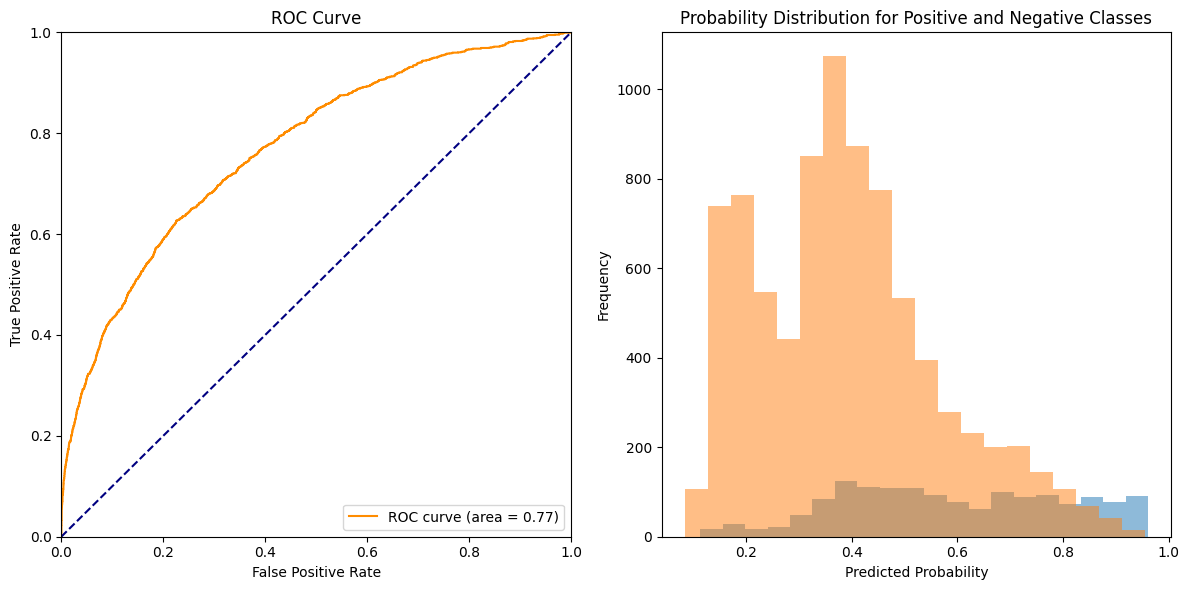

In [ ]:
#fitting the model to training set
rfc_exp1, rfc_exp1_details, rfc_exp1_metric= train_rfc_rand(rand_param_grid, X_train, y_train, X_val, y_val, n_iter= 10, n_splits=5, rand_srch=1)

In [ ]:
# Analysing parameters from each iteration of RandomSearchCV
rfc_exp1_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.751524,0.002975,7.016982,100,50,50,0.4,sqrt,20,balanced
1,0.751463,0.003147,36.608068,650,110,110,0.7,sqrt,30,balanced
2,0.751241,0.003033,27.777211,450,170,170,0.8,sqrt,25,balanced
3,0.751054,0.003009,39.757466,400,190,170,0.8,sqrt,10,balanced_subsample
4,0.751030,0.003195,15.343272,150,110,170,0.7,sqrt,10,balanced_subsample
5,0.750836,0.003064,19.160426,200,190,170,0.6,sqrt,30,balanced_subsample
6,0.750605,0.002879,15.845921,350,110,190,0.4,sqrt,20,balanced
7,0.750543,0.002937,27.324820,500,70,150,0.3,sqrt,10,balanced
8,0.749320,0.002834,29.279454,400,150,170,0.8,sqrt,5,balanced_subsample
9,0.749147,0.002860,35.553925,650,90,170,0.7,sqrt,5,balanced


In [ ]:
# feature importance
rfc_exp1_details[3].head(10)

,feature,importance
0,orders_1yr,0.182541
1,RFM_N3_Cas,0.149180
2,line_items_1yr,0.148378
3,days_since_last_purchase_1yr,0.100203
4,RFM_E1_VIP,0.072506
5,Payment_bnpl_prop_revenue_1yr,0.054753
6,Brand_Nike_prop_revenue_1yr,0.048625
7,amount_paid_per_order_1yr,0.043511
8,prop_reduced_items_1yr,0.035838
9,RFM_E3_Cas,0.030488


## Experiment 2 (Splitting RFM)

### Feature Engineering

In [ ]:
df_exp2= df_train.copy()

# splitting the RFM_segments into recency and type
df_exp2['recency']= df_exp2.Current_RFM_Segment.map(lambda x: x.split('_')[0])
df_exp2['RFM_type']= df_exp2.Current_RFM_Segment.map(lambda x: x.split(' ')[-1])

In [ ]:
df_exp2= pd.get_dummies(df_exp2, columns=['recency', 'RFM_type', 'ONS_Segment'])

In [ ]:
df_exp2.drop(columns=['Current_RFM_Segment', 'recency_New', 'RFM_type_UNKNOWN', 'ONS_Segment_ONS_Unknown'], inplace= True)
df_exp2.rename(columns={
    'recency_Existing': 'Cust_Existing',
    'recency_UNKNOWN': 'RFM_Unknown',
    'RFM_type_VIP' : 'RFM_VIP1',
    'RFM_type_POTENTIALS': 'RFM_Pot2',
    'RFM_type_AVERAGE': 'RFM_Avg3',
    'RFM_type_LAPSED': 'RFM_Laps4',
    'RFM_type_DORMANT': 'RFM_Dorm5',

    'ONS_Segment_ONS_1': 'ONS1',
    'ONS_Segment_ONS_2': 'ONS2',
    'ONS_Segment_ONS_3': 'ONS3',
    'ONS_Segment_ONS_4': 'ONS4',
    'ONS_Segment_ONS_5': 'ONS5',
    'ONS_Segment_ONS_6': 'ONS6',
    'ONS_Segment_ONS_7': 'ONS7',
    'ONS_Segment_ONS_8': 'ONS8'
}, inplace= True)

In [ ]:
X_train, X_val, y_train, y_val= data_prep(df_exp2)

### Modelling (RandomForest Classifier)

Time to fit: 691.9651634693146 secs
Best Params: {'n_estimators': 400, 'min_samples_split': 110, 'min_samples_leaf': 50, 'max_samples': 0.4000000000000001, 'max_features': 'sqrt', 'max_depth': 30, 'class_weight': 'balanced'}
ROC AUC  : 0.77
Threshold: 0.5760000000000001
F1 Score : 0.44
Precision: 0.40
Recall   : 0.50


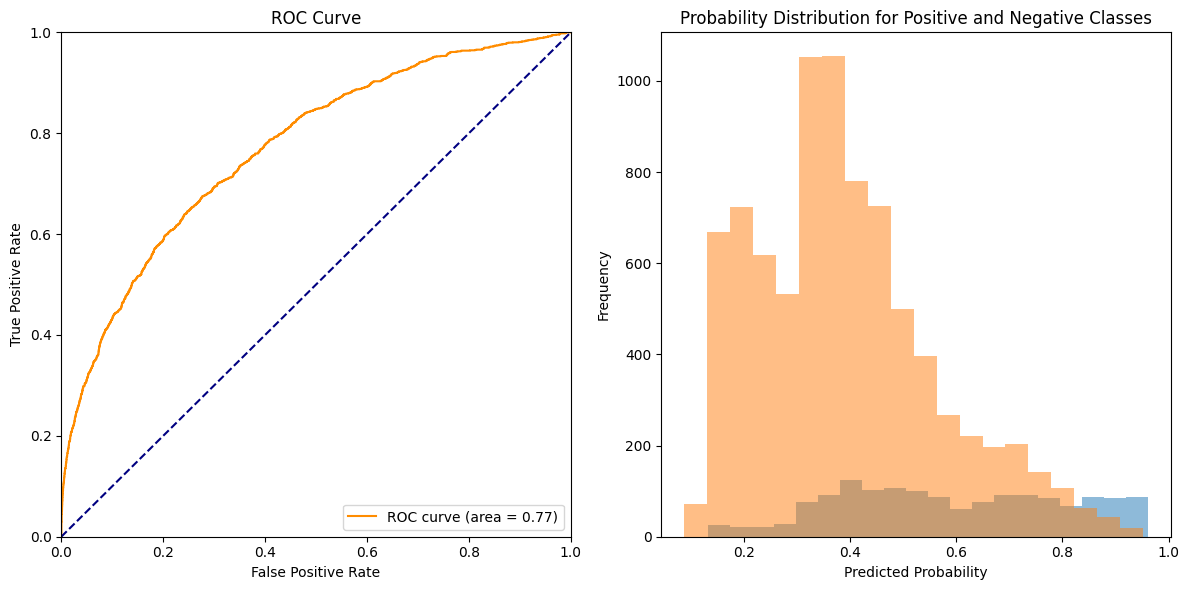

In [ ]:
rfc_exp2, rfc_exp2_details, rfc_exp2_metric= train_rfc_rand(rand_param_grid, X_train, y_train, X_val, y_val, n_iter= 10, n_splits=5, rand_srch=2)

In [ ]:
rfc_exp2_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.751768,0.003529,19.920586,400,110,50,0.4,sqrt,30,balanced
1,0.751381,0.003282,44.044153,450,110,70,0.6,sqrt,15,balanced_subsample
2,0.751364,0.003108,35.617826,500,190,130,0.8,sqrt,25,balanced
3,0.751199,0.003010,28.908820,500,90,150,0.6,sqrt,30,balanced
4,0.751077,0.002933,14.983566,200,110,130,0.5,sqrt,30,balanced_subsample
5,0.750598,0.002897,38.005028,700,110,110,0.2,sqrt,10,balanced_subsample
6,0.750256,0.002947,6.288039,100,110,170,0.4,sqrt,30,balanced
7,0.750225,0.002625,8.253512,200,90,190,0.3,sqrt,30,balanced_subsample
8,0.750132,0.002864,13.160900,250,190,150,0.2,sqrt,10,balanced_subsample
9,0.748973,0.002711,59.086598,700,70,150,0.8,sqrt,5,balanced_subsample


In [ ]:
rfc_exp2_details[3].head(10)

,feature,importance
0,orders_1yr,0.195022
1,line_items_1yr,0.139258
2,RFM_Avg3,0.116309
3,Cust_Existing,0.108968
4,days_since_last_purchase_1yr,0.097328
5,RFM_VIP1,0.073281
6,Payment_bnpl_prop_revenue_1yr,0.051866
7,amount_paid_per_order_1yr,0.045111
8,Brand_Nike_prop_revenue_1yr,0.036238
9,prop_reduced_items_1yr,0.025055


## Experiment 3 (Ordinals)

### Feature Engineering

In [ ]:
df_exp3= df_train.copy()
df_exp3['recency']= df_exp3.Current_RFM_Segment.map(lambda x: x.split('_')[0])
df_exp3['RFM_type']= df_exp3.Current_RFM_Segment.map(lambda x: x.split(' ')[-1])

In [ ]:
# creating ordinals for RFM_type as they seem to have a logical heraricy
rfm_mapping = {
    'VIP': 5,
    'POTENTIALS': 4,
    'AVERAGE': 3,
    'LAPSED': 2,
    'DORMANT': 1,
    'UNKNOWN': 0
}
df_exp3['RFM_type'] = df_exp3['RFM_type'].map(rfm_mapping)

In [ ]:
df_exp3= pd.get_dummies(df_exp3, columns=['recency', 'ONS_Segment'])

In [ ]:
df_exp3.drop(columns=['Current_RFM_Segment', 'recency_New', 'ONS_Segment_ONS_Unknown'], inplace= True)
df_exp3.rename(columns={
    'recency_Existing': 'Cust_Existing',
    'recency_UNKNOWN': 'RFM_Unknown',

    'ONS_Segment_ONS_1': 'ONS1',
    'ONS_Segment_ONS_2': 'ONS2',
    'ONS_Segment_ONS_3': 'ONS3',
    'ONS_Segment_ONS_4': 'ONS4',
    'ONS_Segment_ONS_5': 'ONS5',
    'ONS_Segment_ONS_6': 'ONS6',
    'ONS_Segment_ONS_7': 'ONS7',
    'ONS_Segment_ONS_8': 'ONS8'
}, inplace= True)

In [121]:
X_train, X_val, y_train, y_val= data_prep(df_exp3)

### Modelling (RandomForest Classifier)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Time to fit: 661.9152543544769 secs
Best Params: {'n_estimators': 550, 'min_samples_split': 70, 'min_samples_leaf': 50, 'max_samples': 0.7000000000000002, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': 'balanced_subsample'}
ROC AUC  : 0.77
Threshold: 0.556
F1 Score : 0.44
Precision: 0.38
Recall   : 0.53


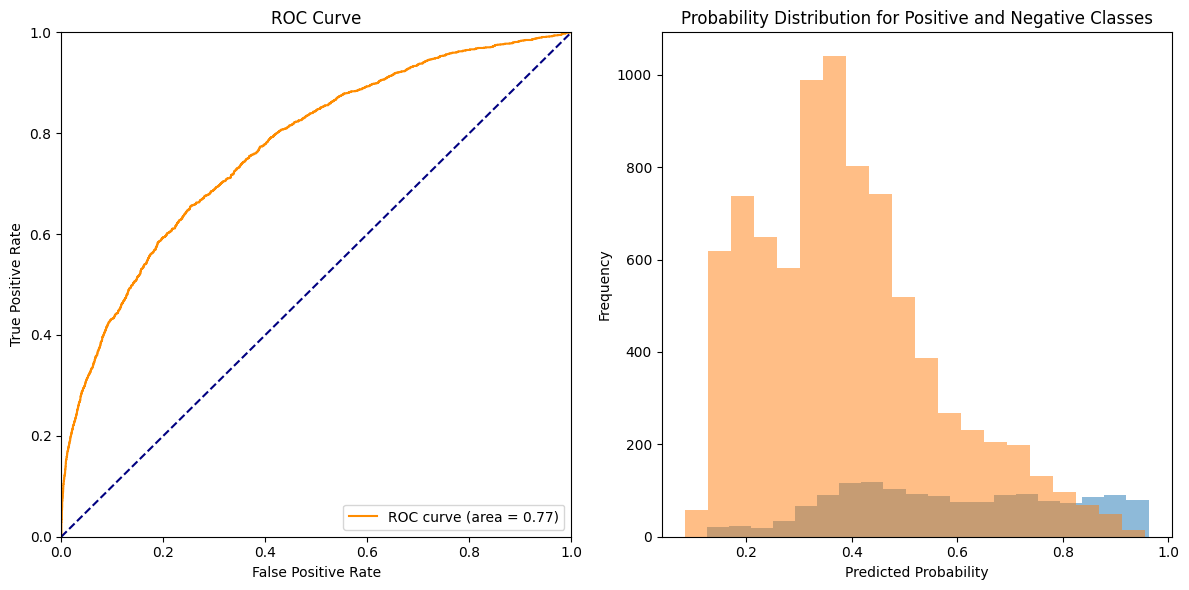

In [ ]:
rfc_exp3, rfc_exp3_details, rfc_exp3_metric= train_rfc_rand(rand_param_grid, X_train, y_train, X_val, y_val, n_iter= 10, n_splits=5, rand_srch=3)

In [ ]:
rfc_exp3_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.751853,0.003460,55.223625,550,70,50,0.7,sqrt,25,balanced_subsample
1,0.751813,0.003346,44.214596,600,70,90,0.7,sqrt,20,balanced
2,0.751771,0.003256,25.678190,300,130,130,0.7,sqrt,10,balanced
3,0.751367,0.003214,31.059895,450,50,150,0.6,sqrt,10,balanced_subsample
4,0.751336,0.003027,20.775624,200,170,170,0.8,sqrt,20,balanced_subsample
5,0.751124,0.002971,17.556984,600,110,90,0.2,sqrt,25,balanced
6,0.750829,0.003004,21.248919,250,150,170,0.4,sqrt,30,balanced_subsample
7,0.750604,0.003085,5.491954,100,190,170,0.4,sqrt,20,balanced_subsample
8,0.750047,0.002813,27.373631,500,50,170,0.2,sqrt,15,balanced_subsample
9,0.749529,0.002902,41.392947,400,170,190,0.8,sqrt,5,balanced_subsample


In [146]:
rfc_exp3_details[3].head(10)

,feature,importance
0,orders_1yr,0.194593
1,line_items_1yr,0.158814
2,RFM_type,0.134553
3,days_since_last_purchase_1yr,0.114715
4,Cust_Existing,0.110032
5,Payment_bnpl_prop_revenue_1yr,0.063128
6,amount_paid_per_order_1yr,0.046372
7,Brand_Nike_prop_revenue_1yr,0.037904
8,prop_reduced_items_1yr,0.034391
9,Brand_Adidas_prop_revenue_1yr,0.018904


## Experiment 5 (SMOTE)

### Feature Engineering

In [ ]:
df_exp5= df_exp3.copy()

In [ ]:
X_train, X_val, y_train, y_val= data_prep(df_exp5)

In [ ]:
# creating a dictionary for all experiments to be performed (Spoiler alert! only few will be executed)
exp_dict= {
    'exp_num': [501,502,503,504,505,506,507,508,509,510,511,512],
    'samp_ratio, k_nghr': [(0.9, 5), (0.9, 10), (0.9, 15), (0.9, 20)
                          , (0.75, 5), (0.75, 10), (0.75, 15), (0.75, 20)
                          , (0.5, 5), (0.5, 10), (0.5, 15), (0.5, 20)]
    }

In [ ]:
# creating function for SMOTE
def smoting(X_train, y_train, sampling_strategy, k_neighbors, random_state):
  smote= SMOTE(sampling_strategy= sampling_strategy, k_neighbors= k_neighbors, random_state= random_state, n_jobs= -1)
  X_smote, y_smote= smote.fit_resample(X_train, y_train)
  samp_rat= (y_smote.value_counts()).loc[1]/(y_smote.value_counts()).loc[0]
  print(f"Sampling Ratio: {samp_rat:.2f}")
  return X_smote, y_smote

### Experiment 501

In [ ]:
num= 0
curr_exp= exp_dict['exp_num'][num] # exp number
samp_ratio= exp_dict['samp_ratio, k_nghr'][num][0] # minority/majority ratio
k_nghr= exp_dict['samp_ratio, k_nghr'][num][1] # k_neighbors

In [ ]:
# oversampling
X_smote, y_smote= smoting(X_train, y_train, sampling_strategy= samp_ratio, k_neighbors= k_nghr, random_state= curr_exp)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Sampling Ratio: 0.90


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Time to fit: 1102.6585094928741 secs
Best Params: {'n_estimators': 400, 'min_samples_split': 50, 'min_samples_leaf': 110, 'max_samples': 0.7000000000000002, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced'}
ROC AUC  : 0.76
Threshold: 0.41400000000000003
F1 Score : 0.43
Precision: 0.36
Recall   : 0.55


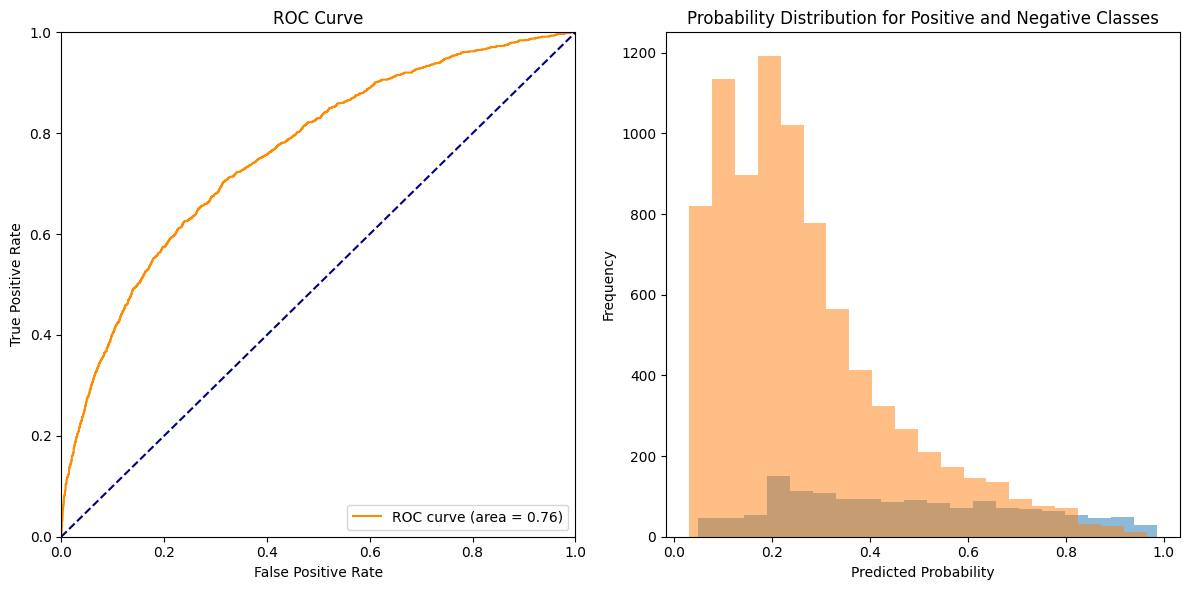

In [ ]:
rfc_exp501, rfc_exp501_details, rfc_exp501_metric= train_rfc_rand(rand_param_grid, X_smote, y_smote, X_val, y_val, n_iter= 5, n_splits=5, rand_srch=curr_exp)

ROC AUC  : 0.89
Threshold: 0.532
F1 Score : 0.76
Precision: 0.80
Recall   : 0.73


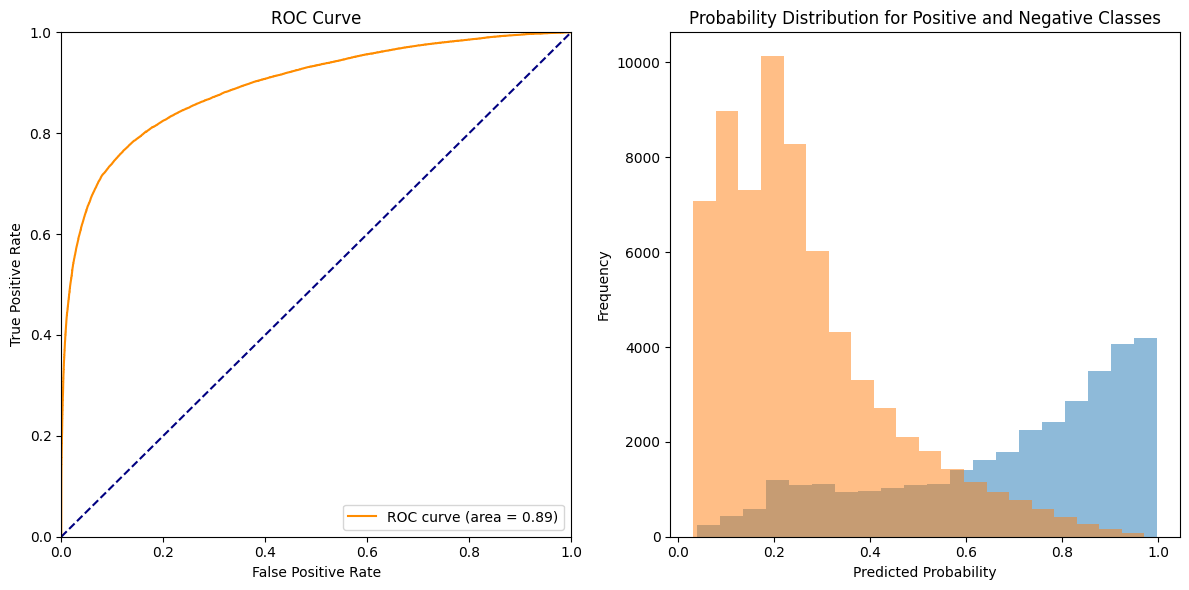

(0.8939021673753391,
 0.532,
 0.7637640707910315,
 0.7959151057981205,
 0.7341096698113208)

In [ ]:
# checking distribution on training set
eval_metrics(rfc_exp501, X_smote, y_smote)

In [ ]:
rfc_exp501_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.922478,0.000964,98.032602,400,50,110,0.7,sqrt,20,balanced
1,0.920048,0.001119,70.204143,300,190,130,0.6,sqrt,30,balanced
2,0.916583,0.001151,123.968335,400,130,190,0.7,sqrt,30,balanced_subsample
3,0.894208,0.001397,79.752201,650,170,50,0.5,sqrt,5,balanced_subsample
4,0.892146,0.001521,54.300356,700,50,130,0.3,sqrt,5,balanced_subsample


In [ ]:
rfc_exp501_details[3].head(10)

,feature,importance
0,orders_1yr,0.165310
1,Payment_bnpl_prop_revenue_1yr,0.151594
2,Cust_Existing,0.123695
3,Brand_Nike_prop_revenue_1yr,0.110124
4,prop_reduced_items_1yr,0.087627
5,Device_mobile_prop_revenue_1yr,0.081954
6,Device_iosapp_prop_revenue_1yr,0.060034
7,Brand_Adidas_prop_revenue_1yr,0.052364
8,line_items_1yr,0.041249
9,ONS8,0.024038


### Experiment 510

In [ ]:
num= 9
curr_exp= exp_dict['exp_num'][num]
samp_ratio= exp_dict['samp_ratio, k_nghr'][num][0]
k_nghr= exp_dict['samp_ratio, k_nghr'][num][1]

In [ ]:
X_smote, y_smote= smoting(X_train, y_train, sampling_strategy= samp_ratio, k_neighbors= k_nghr, random_state= curr_exp)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Sampling Ratio: 0.50


Time to fit: 617.5534479618073 secs
Best Params: {'n_estimators': 650, 'min_samples_split': 190, 'min_samples_leaf': 110, 'max_samples': 0.6000000000000001, 'max_features': 'sqrt', 'max_depth': 15, 'class_weight': 'balanced_subsample'}
ROC AUC  : 0.76
Threshold: 0.468
F1 Score : 0.44
Precision: 0.36
Recall   : 0.57


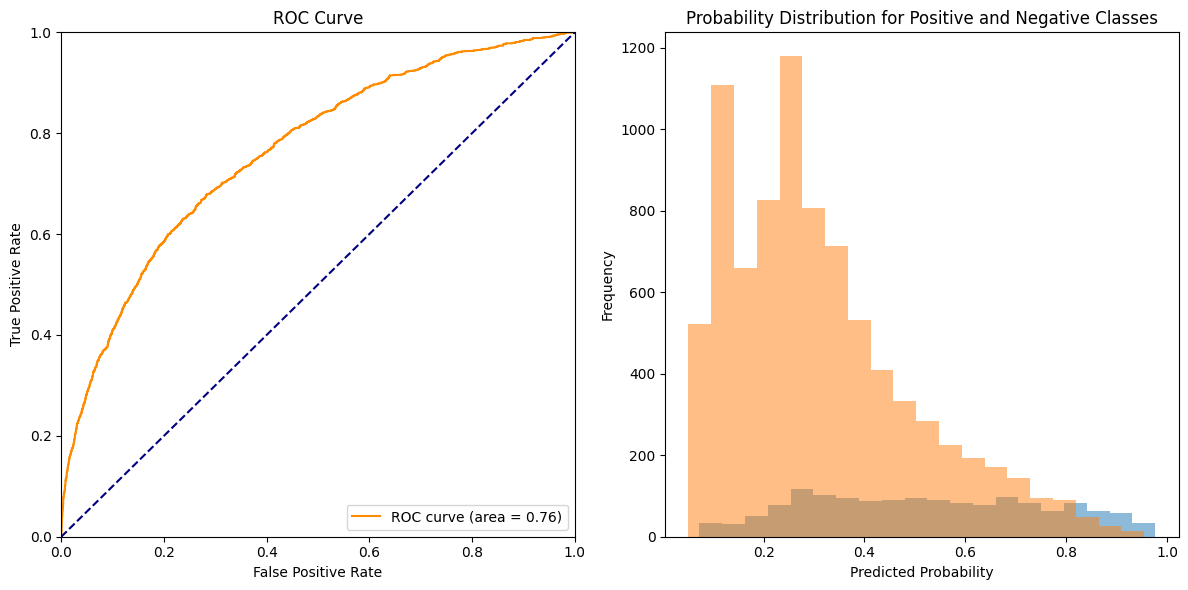

In [ ]:
rfc_exp510, rfc_exp510_details, rfc_exp510_metric= train_rfc_rand(rand_param_grid, X_smote, y_smote, X_val, y_val, n_iter= 5, n_splits=5, rand_srch=curr_exp)

In [ ]:
rfc_exp510_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.879930,0.002704,102.241817,650,190,110,0.6,sqrt,15,balanced_subsample
1,0.877263,0.002972,59.736355,450,90,130,0.6,sqrt,10,balanced_subsample
2,0.875143,0.003103,29.444259,200,70,170,0.7,sqrt,10,balanced
3,0.871676,0.002964,13.112777,150,90,90,0.2,sqrt,30,balanced_subsample
4,0.857906,0.003326,33.154660,400,110,170,0.5,sqrt,5,balanced


In [ ]:
rfc_exp510_details[3].head(10)

,feature,importance
0,orders_1yr,0.205856
1,Payment_bnpl_prop_revenue_1yr,0.139308
2,Cust_Existing,0.131935
3,Brand_Nike_prop_revenue_1yr,0.099481
4,prop_reduced_items_1yr,0.093073
5,Device_mobile_prop_revenue_1yr,0.070842
6,line_items_1yr,0.054822
7,Device_iosapp_prop_revenue_1yr,0.048955
8,Brand_Adidas_prop_revenue_1yr,0.041830
9,RFM_type,0.026744


### Experiment 511 (Randomise train_test)

In [ ]:
num= 10
curr_exp= exp_dict['exp_num'][num]
samp_ratio= exp_dict['samp_ratio, k_nghr'][num][0]
k_nghr= exp_dict['samp_ratio, k_nghr'][num][1]

In [ ]:
# checking with shuffling the data
X_train, X_val, y_train, y_val= data_prep(df_exp5, random_state= curr_exp)

In [ ]:
X_smote, y_smote= smoting(X_train, y_train, sampling_strategy= samp_ratio, k_neighbors= k_nghr, random_state= curr_exp)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Sampling Ratio: 0.50


Time to fit: 683.5866048336029 secs
Best Params: {'n_estimators': 500, 'min_samples_split': 170, 'min_samples_leaf': 130, 'max_samples': 0.6000000000000001, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced'}
ROC AUC  : 0.74
Threshold: 0.542
F1 Score : 0.42
Precision: 0.39
Recall   : 0.46


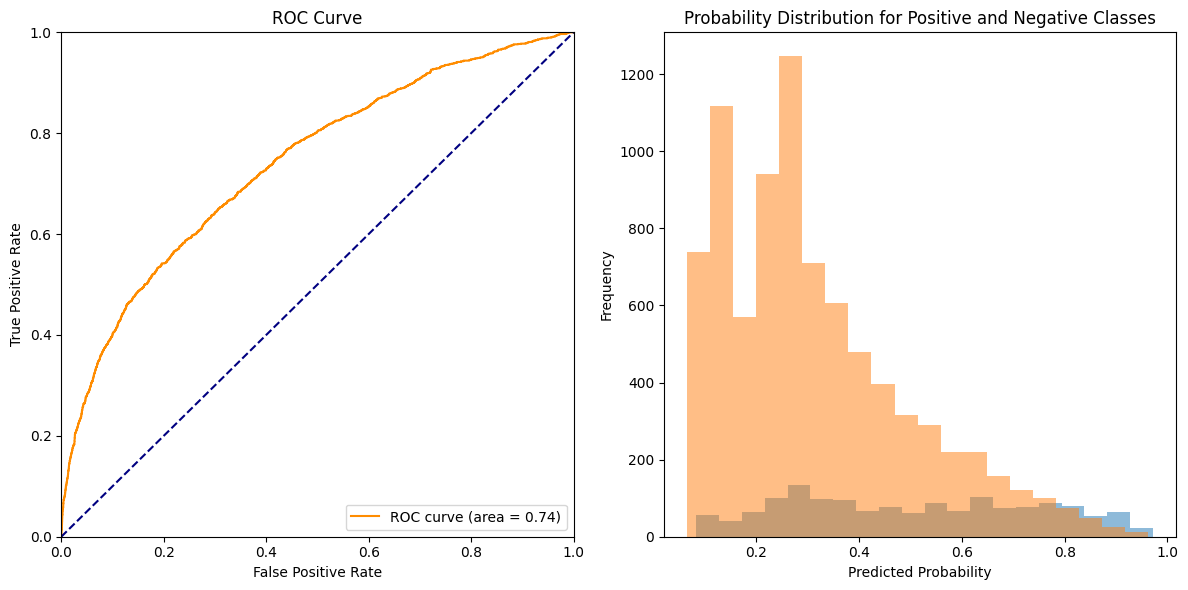

In [ ]:
rfc_exp511, rfc_exp511_details, rfc_exp511_metric= train_rfc_rand(rand_param_grid, X_smote, y_smote, X_val, y_val, n_iter= 5, n_splits=5, rand_srch=curr_exp)

In [ ]:
rfc_exp511_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.879431,0.001594,56.997887,500,170,130,0.6,sqrt,10,balanced
1,0.877531,0.001295,17.932926,250,150,70,0.2,sqrt,25,balanced
2,0.877427,0.001973,51.290134,550,170,150,0.5,sqrt,15,balanced
3,0.875057,0.001532,60.174264,550,130,150,0.4,sqrt,10,balanced_subsample
4,0.863887,0.001808,70.568210,700,150,50,0.6,sqrt,5,balanced


In [ ]:
rfc_exp511_details[3].head(10)

,feature,importance
0,orders_1yr,0.218605
1,Payment_bnpl_prop_revenue_1yr,0.144270
2,Cust_Existing,0.139865
3,Brand_Nike_prop_revenue_1yr,0.092051
4,prop_reduced_items_1yr,0.084083
5,Device_mobile_prop_revenue_1yr,0.063656
6,line_items_1yr,0.058801
7,Device_iosapp_prop_revenue_1yr,0.048729
8,Brand_Adidas_prop_revenue_1yr,0.040216
9,RFM_type,0.027233


### Experiment 512

In [ ]:
num= 11
curr_exp= exp_dict['exp_num'][num]
samp_ratio= exp_dict['samp_ratio, k_nghr'][num][0]
k_nghr= exp_dict['samp_ratio, k_nghr'][num][1]

In [ ]:
X_smote, y_smote= smoting(X_train, y_train, sampling_strategy= samp_ratio, k_neighbors= k_nghr, random_state= curr_exp)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Sampling Ratio: 0.50


Time to fit: 531.4727404117584 secs
Best Params: {'n_estimators': 700, 'min_samples_split': 90, 'min_samples_leaf': 90, 'max_samples': 0.7000000000000002, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced_subsample'}
ROC AUC  : 0.76
Threshold: 0.446
F1 Score : 0.44
Precision: 0.35
Recall   : 0.59


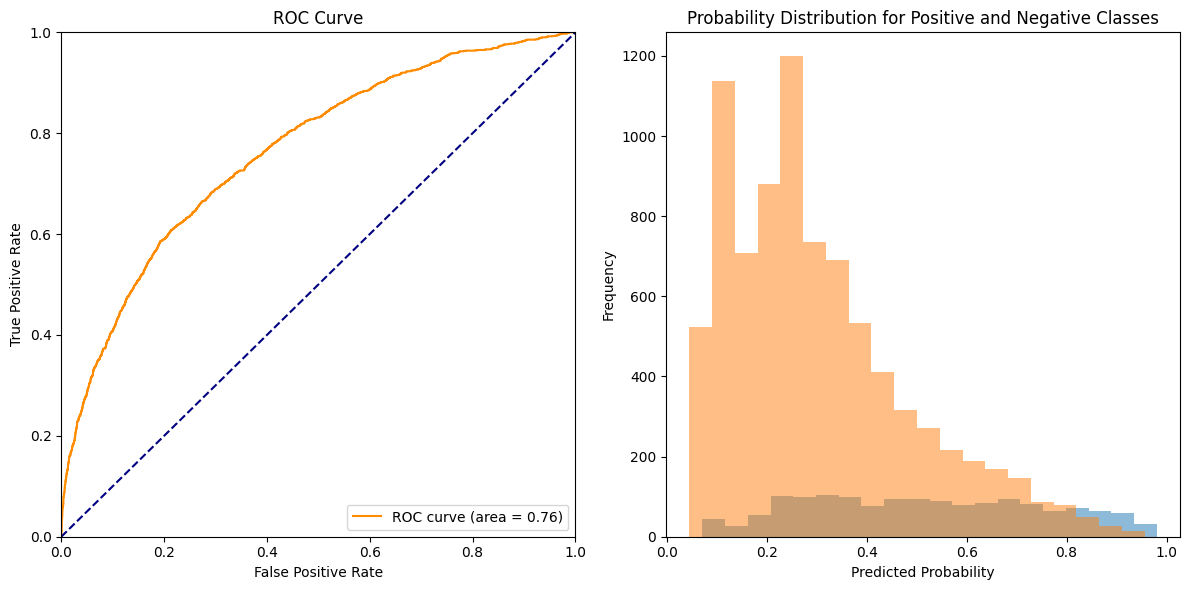

In [ ]:
rfc_exp512, rfc_exp512_details, rfc_exp512_metric= train_rfc_rand(rand_param_grid, X_smote, y_smote, X_val, y_val, n_iter= 5, n_splits=5, rand_srch=curr_exp)

In [ ]:
rfc_exp512_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.884668,0.002734,114.462547,700,90,90,0.7,sqrt,20,balanced_subsample
1,0.883655,0.002509,15.592896,150,70,90,0.6,sqrt,15,balanced
2,0.881323,0.002574,51.994779,500,170,130,0.7,sqrt,15,balanced
3,0.878932,0.002370,17.561335,150,150,170,0.8,sqrt,20,balanced
4,0.861052,0.002895,18.624721,300,130,150,0.5,sqrt,5,balanced


In [ ]:
rfc_exp512_details[3].head(10)

,feature,importance
0,orders_1yr,0.209179
1,Payment_bnpl_prop_revenue_1yr,0.141776
2,Cust_Existing,0.126619
3,Brand_Nike_prop_revenue_1yr,0.100326
4,prop_reduced_items_1yr,0.090797
5,Device_mobile_prop_revenue_1yr,0.067220
6,line_items_1yr,0.052293
7,Device_iosapp_prop_revenue_1yr,0.048412
8,Brand_Adidas_prop_revenue_1yr,0.043446
9,days_since_last_purchase_1yr,0.027280


### Experiment 513 (k_nhgr= 50)

In [ ]:
num= 13
curr_exp= 513
samp_ratio= 0.5
k_nghr= 50

In [ ]:
X_smote, y_smote= smoting(X_train, y_train, sampling_strategy= samp_ratio, k_neighbors= k_nghr, random_state= curr_exp)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Sampling Ratio: 0.50


Time to fit: 744.7493102550507 secs
Best Params: {'n_estimators': 350, 'min_samples_split': 70, 'min_samples_leaf': 50, 'max_samples': 0.7000000000000002, 'max_features': 'sqrt', 'max_depth': 15, 'class_weight': 'balanced'}
ROC AUC  : 0.76
Threshold: 0.434
F1 Score : 0.44
Precision: 0.36
Recall   : 0.58


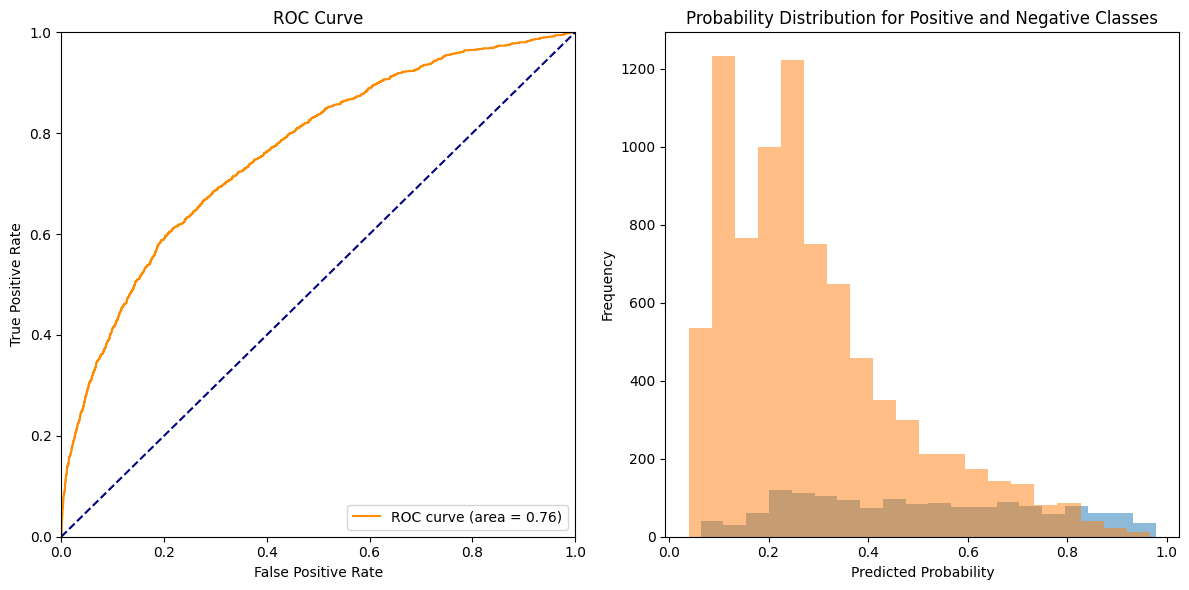

In [ ]:
rfc_exp513, rfc_exp513_details, rfc_exp513_metric= train_rfc_rand(rand_param_grid, X_smote, y_smote, X_val, y_val, n_iter= 5, n_splits=5, rand_srch=curr_exp)

In [ ]:
rfc_exp513_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.889864,0.002460,48.817715,350,70,50,0.7,sqrt,15,balanced
1,0.887375,0.002406,87.074147,700,150,70,0.7,sqrt,15,balanced
2,0.885130,0.002295,60.132881,350,90,90,0.7,sqrt,15,balanced_subsample
3,0.877404,0.002646,22.593506,250,50,150,0.5,sqrt,20,balanced
4,0.877267,0.002601,68.158965,400,50,190,0.7,sqrt,10,balanced_subsample


In [ ]:
rfc_exp513_details[3].head(10)

,feature,importance
0,orders_1yr,0.212628
1,Payment_bnpl_prop_revenue_1yr,0.138511
2,Cust_Existing,0.115643
3,prop_reduced_items_1yr,0.092735
4,Brand_Nike_prop_revenue_1yr,0.090333
5,Device_mobile_prop_revenue_1yr,0.068542
6,line_items_1yr,0.055487
7,Device_iosapp_prop_revenue_1yr,0.048084
8,Brand_Adidas_prop_revenue_1yr,0.046526
9,days_since_last_purchase_1yr,0.029640


## Experiment 6 (Adaptive SMOTE)

### Feature Engineering

In [150]:
df_exp6= df_exp3.copy()

In [151]:
X_train, X_val, y_train, y_val= data_prep(df_exp6)

In [152]:
exp_dict= {
    'exp_num': [601,602,603,604,605,606,607,608,609,610,611,612],
    'samp_ratio, k_nghr': [(0.9, 5), (0.9, 10), (0.9, 15), (0.9, 20)
                          , (0.75, 5), (0.75, 10), (0.75, 15), (0.75, 20)
                          , (0.5, 5), (0.5, 10), (0.5, 15), (0.5, 20)]
    }

In [153]:
# creating instance for ADASYN
def adasyning(X_train, y_train, sampling_strategy, n_neighbors, random_state):
  adasyn= ADASYN(sampling_strategy= sampling_strategy, n_neighbors= n_neighbors, random_state= random_state)
  X_adasyn, y_adasyn= adasyn.fit_resample(X_train, y_train)
  samp_rat= (y_adasyn.value_counts()).loc[1]/(y_adasyn.value_counts()).loc[0]
  print(f"Sampling Ratio: {samp_rat:.2f}")
  return X_adasyn, y_adasyn

### Experiment 612

In [154]:
num= 11
curr_exp= exp_dict['exp_num'][num]
samp_ratio= exp_dict['samp_ratio, k_nghr'][num][0]
n_nghr= exp_dict['samp_ratio, k_nghr'][num][1]

In [155]:
X_adasyn, y_adasyn= adasyning(X_train, y_train, sampling_strategy= samp_ratio, n_neighbors= n_nghr, random_state= curr_exp)

Sampling Ratio: 0.50


Time to fit: 423.87441205978394 secs
Best Params: {'n_estimators': 100, 'min_samples_split': 170, 'min_samples_leaf': 150, 'max_samples': 0.7000000000000002, 'max_features': 'sqrt', 'max_depth': 30, 'class_weight': 'balanced'}
ROC AUC  : 0.76
Threshold: 0.484
F1 Score : 0.44
Precision: 0.36
Recall   : 0.55


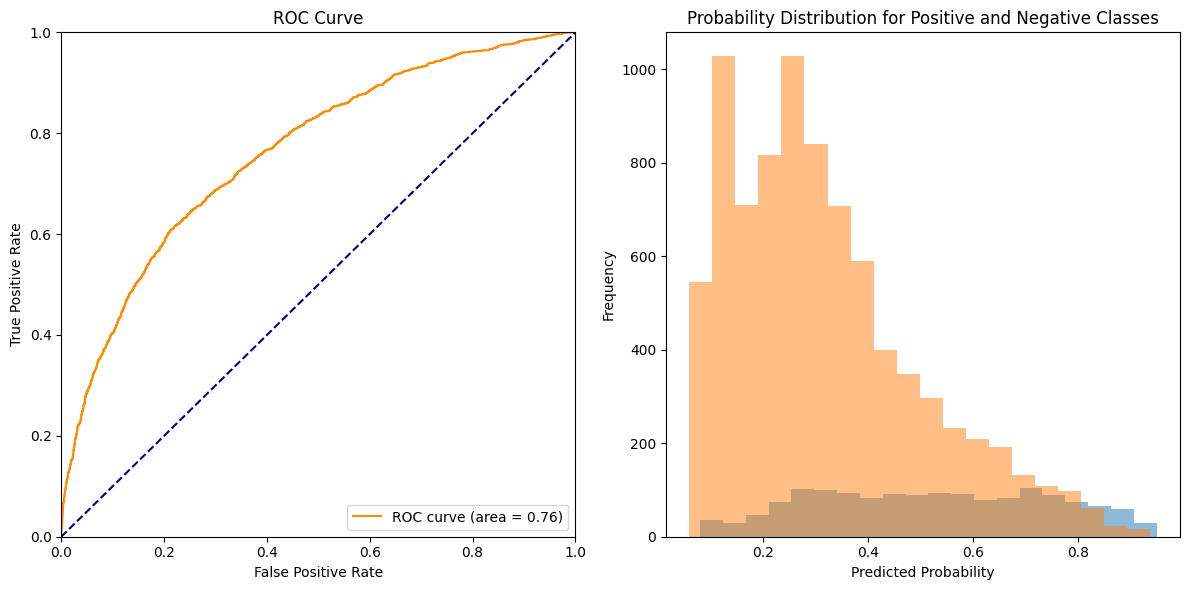

In [156]:
rfc_exp612, rfc_exp612_details, rfc_exp612_metric= train_rfc_rand(rand_param_grid, X_adasyn, y_adasyn, X_val, y_val, n_iter= 5, n_splits=5, rand_srch=curr_exp)

In [157]:
rfc_exp612_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.878008,0.001838,12.560398,100,170,150,0.7,sqrt,30,balanced
1,0.875406,0.001810,41.182948,300,190,190,0.7,sqrt,15,balanced_subsample
2,0.875206,0.001591,76.464452,600,70,170,0.6,sqrt,30,balanced_subsample
3,0.865197,0.001954,23.939271,600,150,150,0.2,sqrt,20,balanced
4,0.858775,0.002845,8.976774,100,130,110,0.6,sqrt,5,balanced


In [158]:
rfc_exp612_details[3].head(10)

,feature,importance
0,orders_1yr,0.233769
1,Payment_bnpl_prop_revenue_1yr,0.161857
2,Cust_Existing,0.116745
3,prop_reduced_items_1yr,0.090463
4,Brand_Nike_prop_revenue_1yr,0.083138
5,Device_mobile_prop_revenue_1yr,0.079962
6,Device_iosapp_prop_revenue_1yr,0.049816
7,Brand_Adidas_prop_revenue_1yr,0.042598
8,line_items_1yr,0.034935
9,RFM_type,0.025091


## Experiment 7 (Random Undersampling)

### Feature Engineering

In [ ]:
df_exp7= df_exp3.copy()

In [ ]:
X_train, X_val, y_train, y_val= data_prep(df_exp7)

In [ ]:
exp_dict= {
    'exp_num': [701,702,703],
    'samp_ratio': [1,0.9,0.8]
    }

In [ ]:
# random undersampling technique
def rand_unsamp(X_train, y_train, sampling_strategy, random_state):
  rand_sampler= RandomUnderSampler(sampling_strategy= sampling_strategy, random_state= random_state)
  X_unsamp, y_unsamp= rand_sampler.fit_resample(X_train, y_train)
  samp_rat= (y_unsamp.value_counts()).loc[1]/(y_unsamp.value_counts()).loc[0]
  print(f"Sampling Ratio: {samp_rat:.2f}")
  return X_unsamp, y_unsamp

### Experiment 701

In [ ]:
num= 0
curr_exp= exp_dict['exp_num'][num]
samp_ratio= exp_dict['samp_ratio'][num]

In [ ]:
X_unsamp, y_unsamp= rand_unsamp(X_train, y_train, sampling_strategy= samp_ratio, random_state= curr_exp)

Sampling Ratio: 1.00


Time to fit: 61.089333057403564 secs
Best Params: {'n_estimators': 350, 'min_samples_split': 70, 'min_samples_leaf': 130, 'max_samples': 0.6000000000000001, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced_subsample'}
ROC AUC  : 0.77
Threshold: 0.5760000000000001
F1 Score : 0.44
Precision: 0.38
Recall   : 0.53


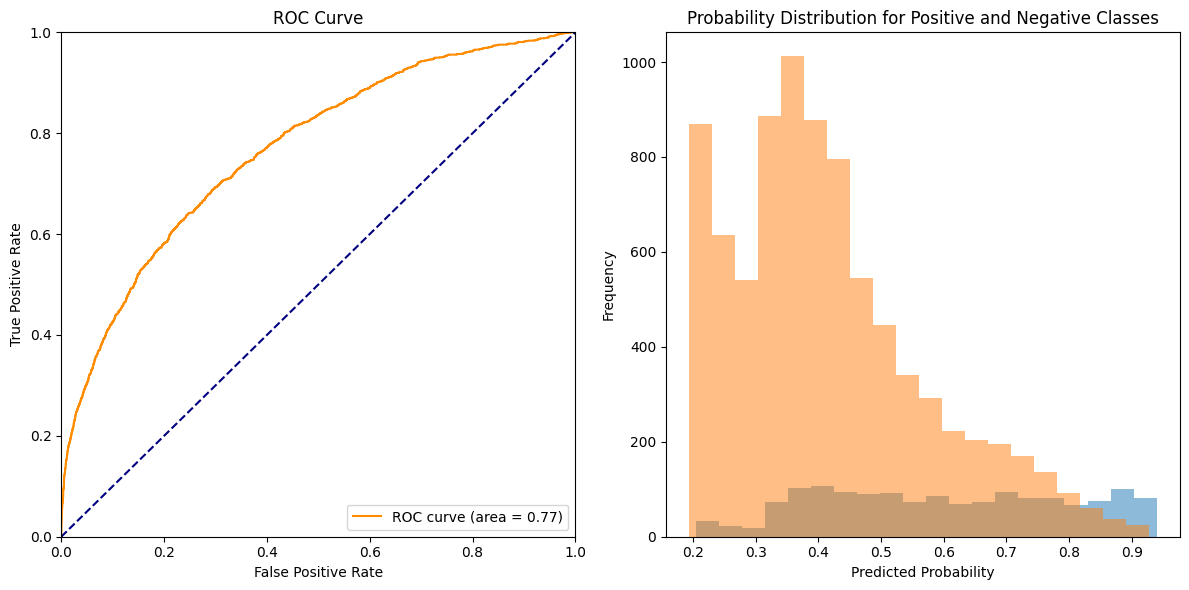

In [ ]:
rfc_exp701, rfc_exp701_details, rfc_exp701_metric= train_rfc_rand(rand_param_grid, X_unsamp, y_unsamp, X_val, y_val, n_iter= 5, n_splits=5, rand_srch=curr_exp)

In [ ]:
rfc_exp701_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.750088,0.004773,8.274663,350,70,130,0.6,sqrt,10,balanced_subsample
1,0.749690,0.004783,8.145982,350,130,190,0.7,sqrt,10,balanced_subsample
2,0.749581,0.005144,1.907285,100,170,130,0.4,sqrt,15,balanced
3,0.749561,0.004679,4.362861,300,190,130,0.7,sqrt,5,balanced
4,0.749150,0.004842,0.857850,50,70,130,0.4,sqrt,15,balanced_subsample


In [ ]:
rfc_exp701_details[3].head(10)

,feature,importance
0,orders_1yr,0.233215
1,line_items_1yr,0.183076
2,RFM_type,0.178844
3,Cust_Existing,0.110976
4,days_since_last_purchase_1yr,0.086032
5,Payment_bnpl_prop_revenue_1yr,0.072358
6,prop_reduced_items_1yr,0.032403
7,Brand_Nike_prop_revenue_1yr,0.029378
8,promo_customer_freedelivery_1yr,0.021559
9,amount_paid_per_order_1yr,0.012936


### Experiment 703

In [ ]:
num= 2
curr_exp= exp_dict['exp_num'][num]
samp_ratio= exp_dict['samp_ratio'][num]

In [ ]:
X_unsamp, y_unsamp= rand_unsamp(X_train, y_train, sampling_strategy= samp_ratio, random_state= curr_exp)

Sampling Ratio: 0.80


Time to fit: 159.63187098503113 secs
Best Params: {'n_estimators': 350, 'min_samples_split': 190, 'min_samples_leaf': 50, 'max_samples': 0.5000000000000001, 'max_features': 'sqrt', 'max_depth': 15, 'class_weight': 'balanced_subsample'}
ROC AUC  : 0.77
Threshold: 0.58
F1 Score : 0.44
Precision: 0.38
Recall   : 0.52


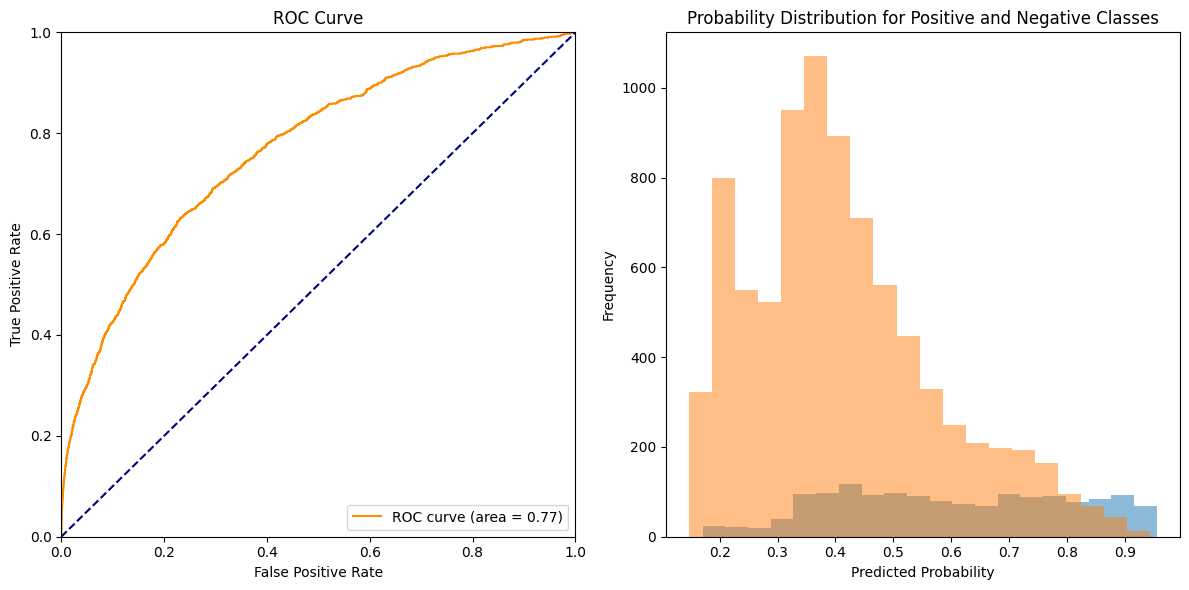

In [ ]:
rfc_exp703, rfc_exp703_details, rfc_exp703_metric= train_rfc_rand(rand_param_grid, X_unsamp, y_unsamp, X_val, y_val, n_iter= 5, n_splits=5, rand_srch=curr_exp)

In [ ]:
rfc_exp703_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.751145,0.002754,13.692263,350,190,50,0.5,sqrt,15,balanced_subsample
1,0.750127,0.002925,19.683536,500,90,150,0.6,sqrt,30,balanced_subsample
2,0.749996,0.002815,1.947739,100,110,70,0.2,sqrt,15,balanced_subsample
3,0.749787,0.003038,18.637934,650,170,50,0.4,sqrt,5,balanced_subsample
4,0.749246,0.003174,5.737672,100,150,70,0.8,sqrt,5,balanced_subsample


In [ ]:
rfc_exp703_details[3].head(10)

,feature,importance
0,orders_1yr,0.219350
1,line_items_1yr,0.175436
2,RFM_type,0.153816
3,Cust_Existing,0.110031
4,days_since_last_purchase_1yr,0.101033
5,Payment_bnpl_prop_revenue_1yr,0.071795
6,prop_reduced_items_1yr,0.034842
7,Brand_Nike_prop_revenue_1yr,0.034820
8,promo_customer_freedelivery_1yr,0.020325
9,amount_paid_per_order_1yr,0.020119


#### Experiment 703a (niter= 100)

Time to fit: 1919.072280883789 secs
Best Params: {'n_estimators': 550, 'min_samples_split': 110, 'min_samples_leaf': 50, 'max_samples': 0.7000000000000002, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced_subsample'}
ROC AUC  : 0.77
Threshold: 0.596
F1 Score : 0.44
Precision: 0.40
Recall   : 0.50


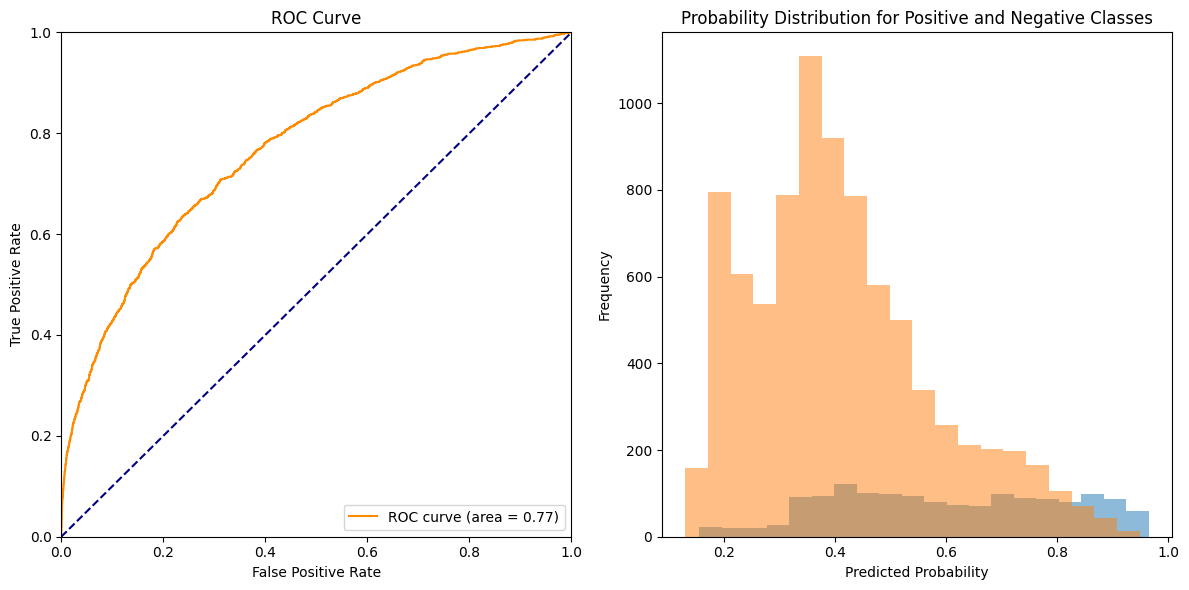

In [ ]:
rfc_exp703a, rfc_exp703a_details, rfc_exp703a_metric= train_rfc_rand(rand_param_grid, X_unsamp, y_unsamp, X_val, y_val, scoring= 'recall',
                                                                  n_iter= 100, n_splits=5, rand_srch=curr_exp+1)

In [ ]:
rfc_exp703a_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.610736,0.008164,17.888516,550,110,50,0.7,sqrt,20,balanced_subsample
1,0.610491,0.008967,4.817951,150,130,50,0.7,sqrt,20,balanced_subsample
2,0.609512,0.009279,8.416634,250,150,50,0.8,sqrt,10,balanced_subsample
3,0.609430,0.009500,3.236912,100,190,50,0.7,sqrt,10,balanced_subsample
4,0.609267,0.008324,8.613104,400,190,50,0.6,sqrt,20,balanced
...,...,...,...,...,...,...,...,...,...,...
95,0.597112,0.004956,0.948182,100,70,190,0.3,sqrt,5,balanced
96,0.596950,0.007971,2.033566,150,110,170,0.2,sqrt,5,balanced_subsample
97,0.596786,0.009735,0.435993,50,110,130,0.2,sqrt,25,balanced
98,0.596624,0.007800,1.924761,50,70,50,0.6,sqrt,5,balanced_subsample


## Experiment 8 (TomekLinks)

### Feature Engineering

In [ ]:
df_exp8= df_exp2.copy()

In [ ]:
X_train, X_val, y_train, y_val= data_prep(df_exp8)

In [ ]:
# initialising TomekLinks
def tomek(X_train, y_train):
  tomek= TomekLinks()
  X_tomek, y_tomek= tomek.fit_resample(X_train, y_train)
  samp_rat= (y_tomek.value_counts()).loc[1]/(y_tomek.value_counts()).loc[0]
  print(f"Sampling Ratio: {samp_rat:.2f}")
  return X_tomek, y_tomek

### Modelling

In [ ]:
X_tomek, y_tomek= tomek(X_train, y_train)

Sampling Ratio: 0.19


Time to fit: 308.60188484191895 secs
Best Params: {'n_estimators': 700, 'min_samples_split': 150, 'min_samples_leaf': 70, 'max_samples': 0.30000000000000004, 'max_features': 'sqrt', 'max_depth': 30, 'class_weight': 'balanced_subsample'}
ROC AUC  : 0.77
Threshold: 0.556
F1 Score : 0.44
Precision: 0.37
Recall   : 0.55


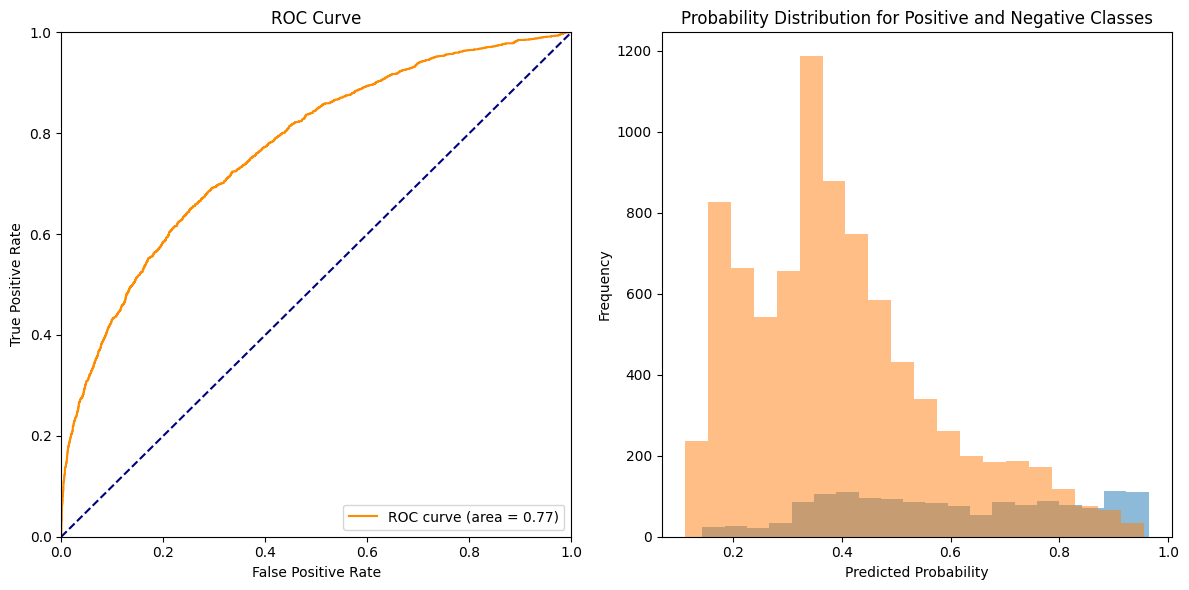

In [ ]:
rfc_exp8, rfc_exp8_details, rfc_exp8_metric= train_rfc_rand(rand_param_grid, X_tomek, y_tomek, X_val, y_val, n_iter= 5, n_splits=5, rand_srch=8)

In [ ]:
rfc_exp8_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.762603,0.003213,44.751407,700,150,70,0.3,sqrt,30,balanced_subsample
1,0.762394,0.003405,5.024714,50,110,150,0.8,sqrt,20,balanced_subsample
2,0.762392,0.003250,32.466375,400,110,130,0.8,sqrt,15,balanced
3,0.762285,0.003344,13.624313,150,150,130,0.6,sqrt,10,balanced
4,0.760508,0.003219,21.070395,650,130,190,0.2,sqrt,25,balanced


In [ ]:
rfc_exp8_details[3].head(10)

,feature,importance
0,orders_1yr,0.201190
1,line_items_1yr,0.145486
2,RFM_Avg3,0.136054
3,Cust_Existing,0.109777
4,RFM_VIP1,0.089725
5,days_since_last_purchase_1yr,0.085980
6,Payment_bnpl_prop_revenue_1yr,0.049578
7,Brand_Nike_prop_revenue_1yr,0.032033
8,amount_paid_per_order_1yr,0.030063
9,RFM_Pot2,0.025451


## Experiment 9 (Other scorers)

### Feature Engineering

In [163]:
df_exp9= df_exp3.copy()

In [164]:
X_train, X_val, y_train, y_val= data_prep(df_exp9)

### Experiment 901 (Precision-Recall)

Time to fit: 175.21887707710266 secs
Best Params: {'n_estimators': 50, 'min_samples_split': 150, 'min_samples_leaf': 110, 'max_samples': 0.7000000000000002, 'max_features': 'sqrt', 'max_depth': 30, 'class_weight': 'balanced_subsample'}
ROC AUC  : 0.77
Threshold: 0.544
F1 Score : 0.45
Precision: 0.37
Recall   : 0.57


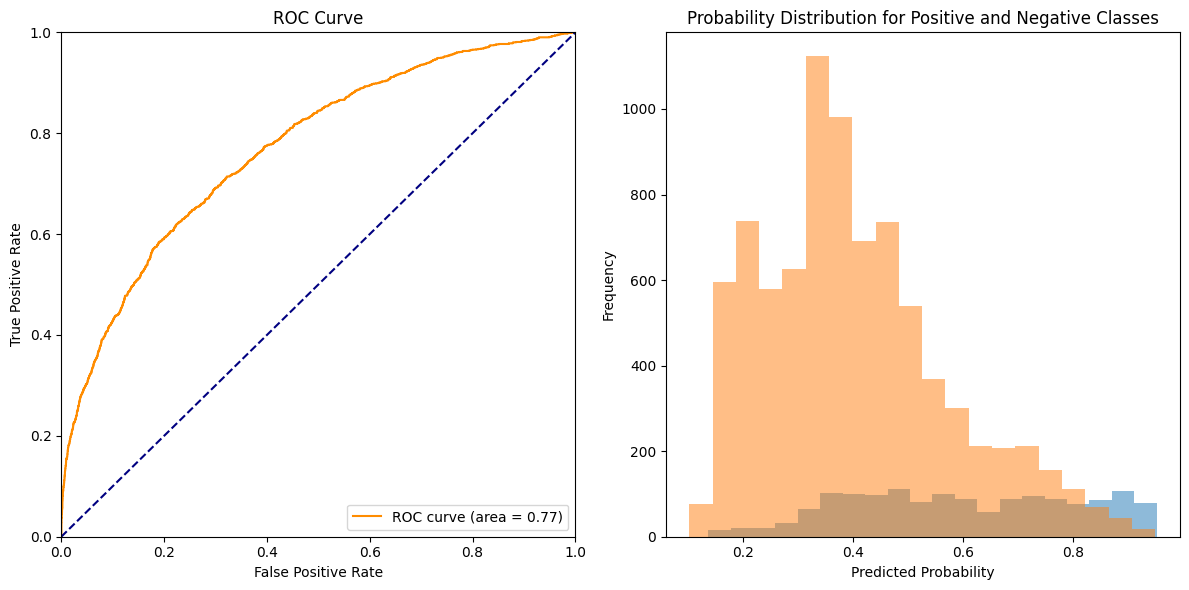

In [165]:
# chaning scorer to average_precision to see if it makes any impact
rfc_exp901, rfc_exp901_details, rfc_exp901_metric= train_rfc_rand(rand_param_grid, X_train, y_train, X_val, y_val, scoring= 'average_precision',
                                                                  n_iter= 5, n_splits=5, rand_srch=901)

### Experiment 902 (Recall)

Time to fit: 307.9889814853668 secs
Best Params: {'n_estimators': 650, 'min_samples_split': 90, 'min_samples_leaf': 190, 'max_samples': 0.30000000000000004, 'max_features': 'sqrt', 'max_depth': 15, 'class_weight': 'balanced'}
ROC AUC  : 0.77
Threshold: 0.562
F1 Score : 0.44
Precision: 0.37
Recall   : 0.54


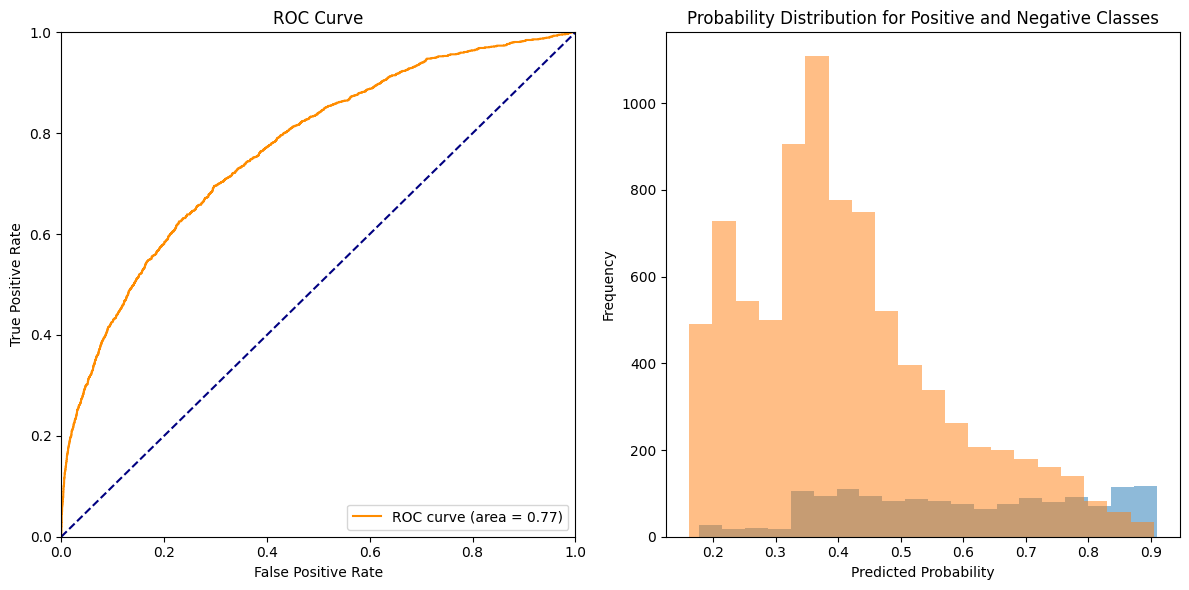

In [166]:
# chaning scorer to recall to see if it makes any impact
rfc_exp902, rfc_exp902_details, rfc_exp902_metric= train_rfc_rand(rand_param_grid, X_train, y_train, X_val, y_val, scoring= 'recall',
                                                                  n_iter= 5, n_splits=5, rand_srch=902)

In [ ]:
rfc_exp902_details[2]

,mean_test_score,std_test_score,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,param_class_weight
0,0.601517,0.008196,26.974903,650,90,190,0.3,sqrt,15,balanced
1,0.598253,0.008742,19.356915,400,130,110,0.3,sqrt,25,balanced_subsample
2,0.595806,0.008277,29.744900,550,50,90,0.3,sqrt,10,balanced_subsample
3,0.594093,0.008858,28.973987,600,90,90,0.4,sqrt,5,balanced_subsample
4,0.587567,0.008221,22.517232,550,130,50,0.3,sqrt,10,balanced


# Results

## Base functions

In [116]:
# Function to transform the test data to the require exp feature set
def trans_func(df_test, exp):

  #transformations of exp 3
  if exp== 3:
    df_test['recency']= df_test.Current_RFM_Segment.map(lambda x: x.split('_')[0])
    df_test['RFM_type']= df_test.Current_RFM_Segment.map(lambda x: x.split(' ')[-1])

    rfm_mapping = {
        'VIP': 5,
        'POTENTIALS': 4,
        'AVERAGE': 3,
        'LAPSED': 2,
        'DORMANT': 1,
        'UNKNOWN': 0
        }
    df_test['RFM_type'] = df_test['RFM_type'].map(rfm_mapping)
    df_test= pd.get_dummies(df_test, columns=['recency', 'ONS_Segment'])
    df_test.drop(columns=['Current_RFM_Segment', 'recency_New', 'ONS_Segment_ONS_Unknown'], inplace= True)
    df_test.rename(columns={
        'recency_Existing': 'Cust_Existing',
        'recency_UNKNOWN': 'RFM_Unknown',

        'ONS_Segment_ONS_1': 'ONS1',
        'ONS_Segment_ONS_2': 'ONS2',
        'ONS_Segment_ONS_3': 'ONS3',
        'ONS_Segment_ONS_4': 'ONS4',
        'ONS_Segment_ONS_5': 'ONS5',
        'ONS_Segment_ONS_6': 'ONS6',
        'ONS_Segment_ONS_7': 'ONS7',
        'ONS_Segment_ONS_8': 'ONS8'
      }, inplace= True)
    X_test= df_test.drop(columns=['customer_site_id', 'repurchased'])
    y_test= df_test['repurchased']
  else:
    print('check exp num')
  return X_test, y_test

In [181]:
# function to evaluate the test dataset given the model trained above
R= df.amount_paid_per_order_1yr.median()
def eval_business_metrics(model, model_thresh, X_test, y_test, R= R, C= 2):

  # predicting probabilities
  y_proba= model.predict_proba(X_test)
  y_proba_pos = y_proba[:, 1]
  # binarising using the optimum threshold
  y_pred= binarize(y_proba_pos.reshape(-1, 1), threshold= model_thresh)

  # Calculating model matrics
  roc_auc= roc_auc_score(y_test, y_proba_pos)
  f1 = f1_score(y_test, y_pred)
  precision= precision_score(y_test, y_pred)
  recall= recall_score(y_test, y_pred)
  confusion_m= confusion_matrix(y_test, y_pred)

  model_metrics= {
      'ROC AUC': roc_auc,
      'F1 Score': f1,
      'Precision': precision,
      'Recall': recall,
      'Confusion Matrix': confusion_m
      }

  print("Model Metrics:")
  print("-----------------")
  print(f"ROC AUC  : {roc_auc:.2f}")
  print(f"F1 Score : {f1:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall   : {recall:.2f}")
  print("")

  # Calculating business matrics
  FP= confusion_m[0,1]
  FN= confusion_m[1,0]
  TP= confusion_m[1,1]
  TN= confusion_m[0,0]

  net_gain= (TP*R - (FP + TP)*C)/(TP+FP)
  TPR= TP/(TP+FN)
  misclsficatn_Cost= FP*C

  business_metrics= {
      'Net gain per user': net_gain,
      'True Positive Rate': TPR,
      'Misclassification Cost': misclsficatn_Cost
      }

  print("Business Metrics:")
  print("-----------------------------")
  print(f"Net gain per user     : {net_gain:.2f}")
  print(f"True Positive Rate    : {TPR:.2f}")
  print(f"Misclassification Cost: {misclsficatn_Cost:.2f}")

  metrics_dict= {
      'Business metrics': business_metrics,
      'Model metrics': model_metrics
      }
  return metrics_dict

## Final Results

### Results of Experiment 3 (Ordinal RFM Features)

In [182]:
# split into X_test and y_test
X_test, y_test= trans_func(df_test, exp= 3)

In [183]:
# Evaluation metrics calculated
metrics_dict= eval_business_metrics(rfc_exp3, rfc_exp3_metric[2], X_test, y_test)

Model Metrics:
-----------------
ROC AUC  : 0.76
F1 Score : 0.41
Precision: 0.29
Recall   : 0.70

Business Metrics:
-----------------------------
Net gain per user     : 30.38
True Positive Rate    : 0.70
Misclassification Cost: 5352.00


In [184]:
# Top 10 features
rfc_exp3_details[3].head(10)

,feature,importance
0,orders_1yr,0.194593
1,line_items_1yr,0.158814
2,RFM_type,0.134553
3,days_since_last_purchase_1yr,0.114715
4,Cust_Existing,0.110032
5,Payment_bnpl_prop_revenue_1yr,0.063128
6,amount_paid_per_order_1yr,0.046372
7,Brand_Nike_prop_revenue_1yr,0.037904
8,prop_reduced_items_1yr,0.034391
9,Brand_Adidas_prop_revenue_1yr,0.018904


### Results of Experiment 512 (SMOTE Over Sampling with Ordinal RFM Features)

In [185]:
X_test, y_test= trans_func(df_test, exp= 3)

In [186]:
metrics_dict= eval_business_metrics(rfc_exp512, rfc_exp512_metric[2], X_test, y_test)

Model Metrics:
-----------------
ROC AUC  : 0.75
F1 Score : 0.43
Precision: 0.34
Recall   : 0.57

Business Metrics:
-----------------------------
Net gain per user     : 36.36
True Positive Rate    : 0.57
Misclassification Cost: 3426.00


In [187]:
# Top 10 features
rfc_exp512_details[3].head(10)

,feature,importance
0,orders_1yr,0.209179
1,Payment_bnpl_prop_revenue_1yr,0.141776
2,Cust_Existing,0.126619
3,Brand_Nike_prop_revenue_1yr,0.100326
4,prop_reduced_items_1yr,0.090797
5,Device_mobile_prop_revenue_1yr,0.067220
6,line_items_1yr,0.052293
7,Device_iosapp_prop_revenue_1yr,0.048412
8,Brand_Adidas_prop_revenue_1yr,0.043446
9,days_since_last_purchase_1yr,0.027280


### Results of Experiment 6 (ADASYN with Ordinal RFM Features)

In [188]:
X_test, y_test= trans_func(df_test, exp= 3)

In [189]:
metrics_dict= eval_business_metrics(rfc_exp612, rfc_exp612_metric[2], X_test, y_test)

Model Metrics:
-----------------
ROC AUC  : 0.75
F1 Score : 0.42
Precision: 0.33
Recall   : 0.59

Business Metrics:
-----------------------------
Net gain per user     : 34.85
True Positive Rate    : 0.59
Misclassification Cost: 3750.00


In [190]:
# Top 10 features
rfc_exp612_details[3].head(10)

,feature,importance
0,orders_1yr,0.233769
1,Payment_bnpl_prop_revenue_1yr,0.161857
2,Cust_Existing,0.116745
3,prop_reduced_items_1yr,0.090463
4,Brand_Nike_prop_revenue_1yr,0.083138
5,Device_mobile_prop_revenue_1yr,0.079962
6,Device_iosapp_prop_revenue_1yr,0.049816
7,Brand_Adidas_prop_revenue_1yr,0.042598
8,line_items_1yr,0.034935
9,RFM_type,0.025091


### Result of Experiment 9 (Other Scorers)

#### Result of Average_Precision

In [191]:
X_test, y_test= trans_func(df_test, exp= 3)

In [192]:
metrics_dict= eval_business_metrics(rfc_exp901, rfc_exp901_metric[2], X_test, y_test)

Model Metrics:
-----------------
ROC AUC  : 0.76
F1 Score : 0.40
Precision: 0.28
Recall   : 0.71

Business Metrics:
-----------------------------
Net gain per user     : 29.47
True Positive Rate    : 0.71
Misclassification Cost: 5656.00


In [193]:
# Top 10 features
rfc_exp901_details[3].head(10)

,feature,importance
0,orders_1yr,0.254888
1,RFM_type,0.148006
2,line_items_1yr,0.146088
3,Cust_Existing,0.099709
4,days_since_last_purchase_1yr,0.099661
5,Payment_bnpl_prop_revenue_1yr,0.069062
6,prop_reduced_items_1yr,0.040474
7,Brand_Nike_prop_revenue_1yr,0.033224
8,amount_paid_per_order_1yr,0.028831
9,Brand_Adidas_prop_revenue_1yr,0.014272


#### Result of Recall

In [194]:
X_test, y_test= trans_func(df_test, exp= 3)

In [195]:
metrics_dict= eval_business_metrics(rfc_exp902, rfc_exp902_metric[2], X_test, y_test)

Model Metrics:
-----------------
ROC AUC  : 0.76
F1 Score : 0.40
Precision: 0.28
Recall   : 0.70

Business Metrics:
-----------------------------
Net gain per user     : 29.27
True Positive Rate    : 0.70
Misclassification Cost: 5644.00


In [196]:
# Top 10 features
rfc_exp902_details[3].head(10)

,feature,importance
0,orders_1yr,0.237456
1,line_items_1yr,0.178371
2,RFM_type,0.171130
3,Cust_Existing,0.119517
4,days_since_last_purchase_1yr,0.085703
5,Payment_bnpl_prop_revenue_1yr,0.066231
6,prop_reduced_items_1yr,0.032074
7,Brand_Nike_prop_revenue_1yr,0.028339
8,promo_customer_freedelivery_1yr,0.018202
9,amount_paid_per_order_1yr,0.015320
